This is a project of early fault prediction of sensors. Essentially, we have to be able to predict the number of days until failure.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df2 = pd.read_csv(r"/content/equipment_failure_data_1.csv")
df1 = pd.read_csv(r"/content/equipment_failure_data_2.csv")
df = pd.concat([df1, df2])
df

ID      DATE REGION_CLUSTER MAINTENANCE_VENDOR MANUFACTURER  \
0       100002   12/2/14              D                  L            R   
1       100002   12/3/14              D                  L            R   
2       100002   12/4/14              D                  L            R   
3       100002   12/5/14              D                  L            R   
4       100002   12/6/14              D                  L            R   
...        ...       ...            ...                ...          ...   
149850  100612  11/27/16              H                  O            V   
149851  100612  11/28/16              H                  O            V   
149852  100612  11/29/16              H                  O            V   
149853  100612  11/30/16              H                  O            V   
149854  100612   12/1/16              H                  O            V   

        WELL_GROUP    S15  S17    S13      S5       S16   S19        S18  \
0                6  23.52  0.0  34.15  4064.0  7.842741  31.1  68.331034   
1                6  27.36  0.0  34.12  4060.0  8.089900  31.1  68.403571   
2                6  29.52  0.0  33.86  4029.0  9.657700  31.1  68.444444   
3                6  22.80  0.0  34.07  4054.0  6.520538  31.1  68.488462   
4                6  24.24  0.0  34.39  4093.0  9.161052  26.3  68.560000   
...            ...    ...  ...    ...     ...       ...   ...        ...   
149850           4  19.68  0.0  24.03  7329.0  4.560000  29.0  95.000000   
149851           4  28.32  0.0  24.36  7429.0  4.600000  30.1  95.000000   
149852           4  20.40  0.0  24.14  7364.0  3.680000  30.1  94.000000   
149853           4  28.32  0.0  24.49  7469.0  3.640000  30.1  95.000000   
149854           4  26.88  0.0  24.59  7501.0  3.080000  20.1  94.000000   

        EQUIPMENT_FAILURE     S8  AGE_OF_EQUIPMENT  
0                       0   0.00               820  
1                       0   0.00               821  
2                       0   0.00               822  
3                       0   0.00               823  
4                       0   0.00               824  
...                   ...    ...               ...  
149850                  0  73.67              1086  
149851                  0  53.18              1087  
149852                  0  53.70              1088  
149853                  0  73.72              1089  
149854                  0  72.83              1090  

[307751 rows x 16 columns]

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values(by=['ID', 'DATE'], inplace=True)
df.isna().sum()

ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

from the code box below we can see that there are 421 IDs. They all fail on one day, and dont fail on the remaining 730.

In [ ]:
import numpy as np
df['flipper'] = np.where((df.ID != df.ID.shift(1)), 1, 0)
flipper_1 = df[df['flipper'] == 1]
unique_dates_flipper_1 = flipper_1['DATE'].nunique()
unique_ids_flipper_1 = flipper_1['ID'].nunique()
flipper_0 = df[df['flipper'] == 0]
unique_dates_flipper_0 = flipper_0['DATE'].nunique()
unique_ids_flipper_0 = flipper_0['ID'].nunique()

(unique_dates_flipper_1, unique_ids_flipper_1, unique_dates_flipper_0, unique_ids_flipper_0)

(1, 421, 730, 421)

In the text box below, we calculate the number of days until failure. We do this by finding the date of failure for each ID (sensor here). We also calculate the number of days until failure.

In [ ]:

failure=df[df['EQUIPMENT_FAILURE'] == 1]
failure=failure[['DATE','ID']]
failure=failure.rename(index=str, columns={"DATE":"FAILURE_DATE"})
df=df.sort_values(by=['ID'], ascending=[True])
failure=failure.sort_values(by=['ID'], ascending=[True])
failure = failure.groupby('ID').last().reset_index()
print(failure)
df = df.merge(failure, on='ID', how='left', suffixes=('', '_from_failure'))
print(df.columns)
df=df.sort_values(by=['ID','DATE'], ascending=[True, True])
df['FAILURE_DATE'] = pd.to_datetime(df['FAILURE_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df['C'] = df['FAILURE_DATE'] - df['DATE']
df['TIME_TO_FAILURE'] = df['C'] / np.timedelta64(1, 'D')
df=df.sort_values(by=['ID', 'DATE'], ascending=[True, True])
df.reset_index(drop=True, inplace=True)
df = df[df['TIME_TO_FAILURE'] >= 0]
# df = df.loc[:,~df.columns.duplicated()]
# df = df.drop(columns=['FAILURE_DATE_y', 'FAILURE_DATE_x'])
df

         ID FAILURE_DATE
0    100001   2015-04-24
1    100002   2015-10-27
2    100003   2016-11-22
3    100006   2016-06-15
4    100007   2015-01-31
..      ...          ...
416  100612   2016-09-08
417  100613   2015-11-22
418  100614   2016-06-23
419  100616   2016-06-13
420  100617   2016-09-21

[421 rows x 2 columns]
Index(['ID', 'DATE', 'REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER',
       'WELL_GROUP', 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18',
       'EQUIPMENT_FAILURE', 'S8', 'AGE_OF_EQUIPMENT', 'flipper',
       'FAILURE_DATE'],
      dtype='object')


ID       DATE REGION_CLUSTER MAINTENANCE_VENDOR MANUFACTURER  \
0       100001 2014-12-02              G                  O            Y   
1       100001 2014-12-03              G                  O            Y   
2       100001 2014-12-04              G                  O            Y   
3       100001 2014-12-05              G                  O            Y   
4       100001 2014-12-06              G                  O            Y   
...        ...        ...            ...                ...          ...   
307675  100617 2016-09-17              C                  P            S   
307676  100617 2016-09-18              C                  P            S   
307677  100617 2016-09-19              C                  P            S   
307678  100617 2016-09-20              C                  P            S   
307679  100617 2016-09-21              C                  P            S   

        WELL_GROUP        S15         S17    S13      S5        S16  S19  \
0                1  11.088000  145.223448  39.34  3501.0   8.426869  1.9   
1                1   8.877943  187.573214  39.20  3489.0   6.483714  1.9   
2                1   8.676444  148.363704  38.87  3459.0   6.159659  2.0   
3                1   9.988338  133.660000  39.47  3513.0   9.320308  2.0   
4                1   8.475264  197.181600  40.33  3589.0   8.022960  1.5   
...            ...        ...         ...    ...     ...        ...  ...   
307675           7  25.920000    0.000000  45.72  3063.0   8.456400  0.2   
307676           7  26.160000    0.000000  43.18  2893.0   8.359200  0.2   
307677           7  26.640000    0.000000  47.57  3187.0   9.331200  0.2   
307678           7  26.400000    0.000000  43.18  2893.0  10.714000  0.2   
307679           7   0.000000    0.000000  42.30  2834.0  11.395800  0.2   

              S18  EQUIPMENT_FAILURE     S8  AGE_OF_EQUIPMENT  flipper  \
0       24.610345                  0   0.00               880        1   
1       24.671429                  0   0.00               881        0   
2       24.733333                  0   0.00               882        0   
3       24.773077                  0   0.00               883        0   
4       24.808000                  0   0.00               884        0   
...           ...                ...    ...               ...      ...   
307675  19.700000                  0  11.51               735        0   
307676  15.400000                  0   8.55               736        0   
307677  17.400000                  0   8.86               737        0   
307678  13.700000                  0   8.60               738        0   
307679  12.900000                  1   8.34               739        0   

       FAILURE_DATE        C  TIME_TO_FAILURE  
0        2015-04-24 143 days            143.0  
1        2015-04-24 142 days            142.0  
2        2015-04-24 141 days            141.0  
3        2015-04-24 140 days            140.0  
4        2015-04-24 139 days            139.0  
...             ...      ...              ...  
307675   2016-09-21   4 days              4.0  
307676   2016-09-21   3 days              3.0  
307677   2016-09-21   2 days              2.0  
307678   2016-09-21   1 days              1.0  
307679   2016-09-21   0 days              0.0  

[171094 rows x 20 columns]

In [ ]:
num_nans = df['TIME_TO_FAILURE'].isna().sum()
print("Number of NaNs in 'DAYS_UNTIL_NEXT_FAILURE':", num_nans)


Number of NaNs in 'DAYS_UNTIL_NEXT_FAILURE': 0


**WE RUN MULTIPLE ANALYSIS HERE.**
We here are splitting our Machines into machines we are using to test the algorithm and machines we are using to train the algorithm. Here we are setting the test size of 55% of the data.

In [ ]:
from sklearn.model_selection import train_test_split
ids = df['ID'].unique()
train_ids, test_ids = train_test_split(ids, test_size=0.55, random_state=42)
train_df = df[df['ID'].isin(train_ids)]
test_df = df[df['ID'].isin(test_ids)]
len(train_df), len(test_df)

(75079, 96015)

We first try using the XGBRegressor.  The XGBRegressor works by building an ensemble of decision trees, where each tree is trained to correct the errors of the previous tree. It uses a boosting technique, meaning that each subsequent tree focuses on the mistakes made by the previous trees, gradually improving the overall prediction performance.

Here we use something called the OneHotEncoder which transforms categorial variables into their one-hot encoded version. That means, that each dependable value can be represented as 0 or 1 * (categorical parameter)

Here, the Column Transformer applies the OneHotEncdoder preprocessor to specific columns in the data.

Here, the model, which is XGBRegressor has hyperparameters that are set by the user.  Here n_estimators tells us number of boosting rounds, max_depth tells us maximum depth of each decision tree, learning_rate tells us step size shrinkage to prevent overfitting, and random_state tell us about reproducibility.

The Pipeline is constructed to sequentially apply the preprocessor and then the XGBoost model.
The pipeline is trained on the training data, where train_df[features] contains the input features, and train_df[target] contains the target values.
Finally, the trained model is used to predict on training and testing data.

We then calculate the root mean squared error of the two and compare.

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
features = ['REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER','WELL_GROUP','S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']
target = 'TIME_TO_FAILURE'
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, features)], remainder='passthrough')
model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    random_state=42
)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(train_df[features], train_df[target])
train_preds = pipeline.predict(train_df[features])
test_preds = pipeline.predict(test_df[features])
train_rmse = mean_squared_error(train_df[target], train_preds, squared=False)
test_rmse = mean_squared_error(test_df[target], test_preds, squared=False)

train_rmse, test_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(152.23488400603253, 178.44891327902812)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


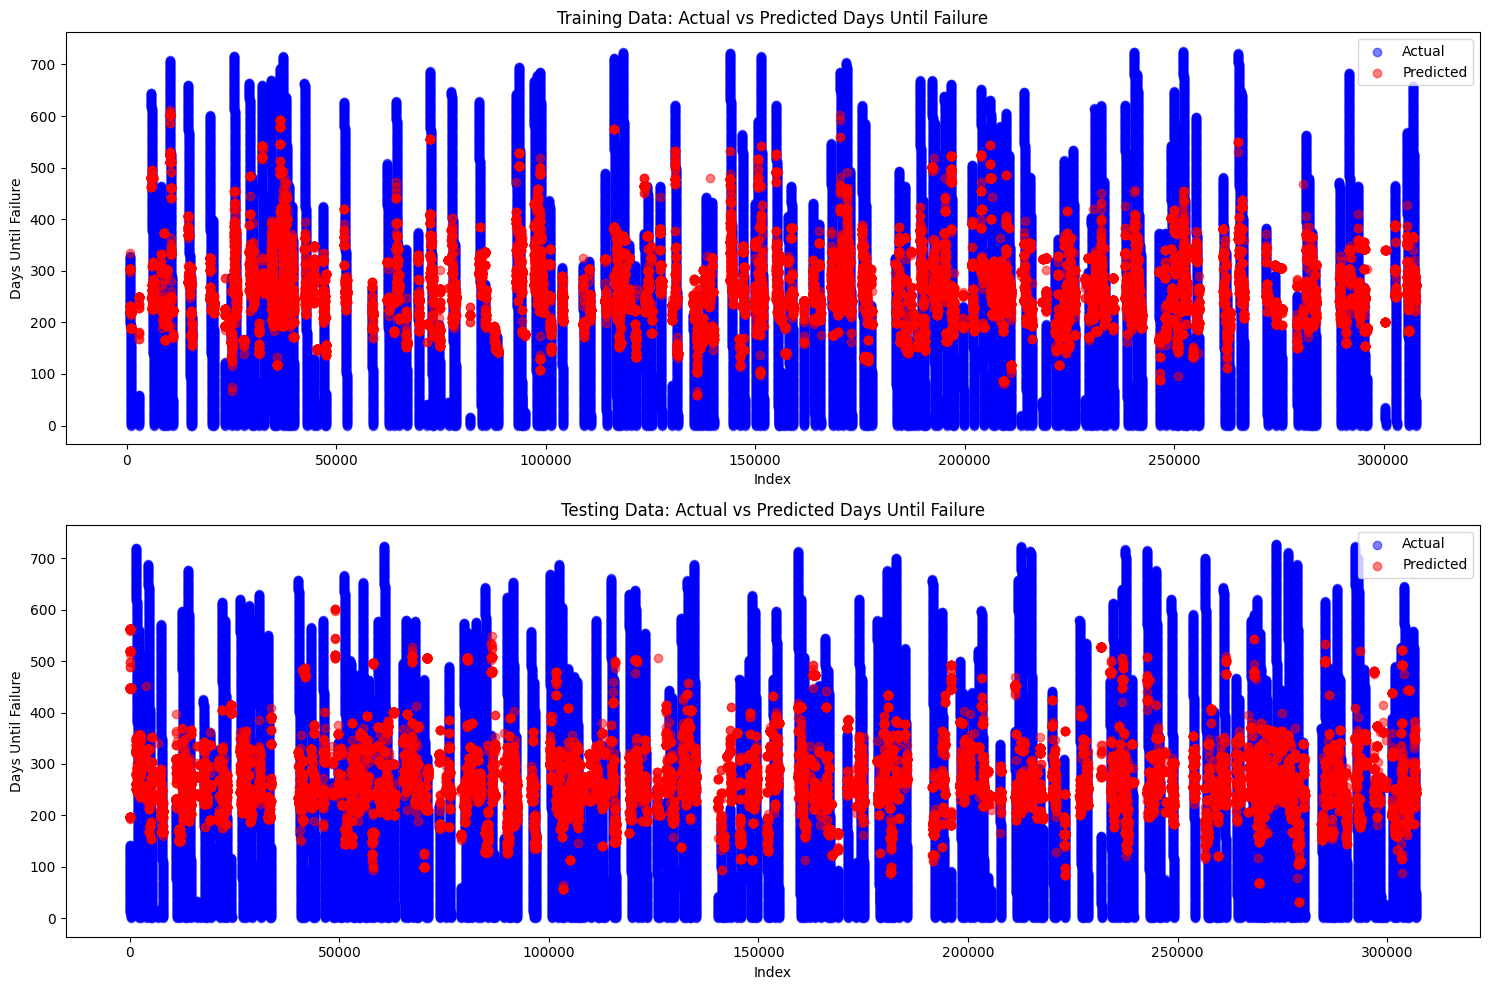

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].scatter(train_df.index, train_df[target], color='blue', label='Actual', alpha=0.5)
ax[0].scatter(train_df.index, train_preds, color='red', label='Predicted', alpha=0.5)
ax[0].set_title('Training Data: Actual vs Predicted Days Until Failure')
ax[0].legend()
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Days Until Failure')
ax[1].scatter(test_df.index, test_df[target], color='blue', label='Actual', alpha=0.5)
ax[1].scatter(test_df.index, test_preds, color='red', label='Predicted', alpha=0.5)
ax[1].set_title('Testing Data: Actual vs Predicted Days Until Failure')
ax[1].legend()
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Days Until Failure')
plt.tight_layout()
plt.show()

LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework that is designed to be both efficient and scalable, making it particularly suitable for large-scale machine learning tasks. It works based on the concept of gradient boosting, which is an ensemble learning technique where multiple weak learners (usually decision trees) are combined to create a strong predictive model.

LigthGBM uses a specialized data structure called Histogram- based Learning to store and manipulate data efficently. Instead of storing individual features it organizes the data into histograms, which reduces memory consumption and speeds up the training.

this algorithm uses something called the "leaf wise tree building" strategy. Here, the algorithm chooses the leaf node with the maximum delta loss to split during tree growth. This results in deeper and more complex trees, which helps the algorithm figure out intricate patterns in the data.
During the tree building process, the model uses a gradient based approach which finds the best splits. It calculates the gradients of the loss function (mean squared error) with respect to the predictions and uses the gradient to make decisions about which features and thresholds to use for splitting.

All other procedure are similar to the previous model.


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
features = ['REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER','WELL_GROUP','S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']
target = 'TIME_TO_FAILURE'
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, features)], remainder='passthrough')
model = LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=5)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(train_df[features], train_df[target])
train_preds = pipeline.predict(train_df[features])
test_preds = pipeline.predict(test_df[features])
train_rmse = mean_squared_error(train_df[target], train_preds, squared=False)
test_rmse = mean_squared_error(test_df[target], test_preds, squared=False)
train_rmse, test_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(147.61281374196278, 179.73816964185662)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


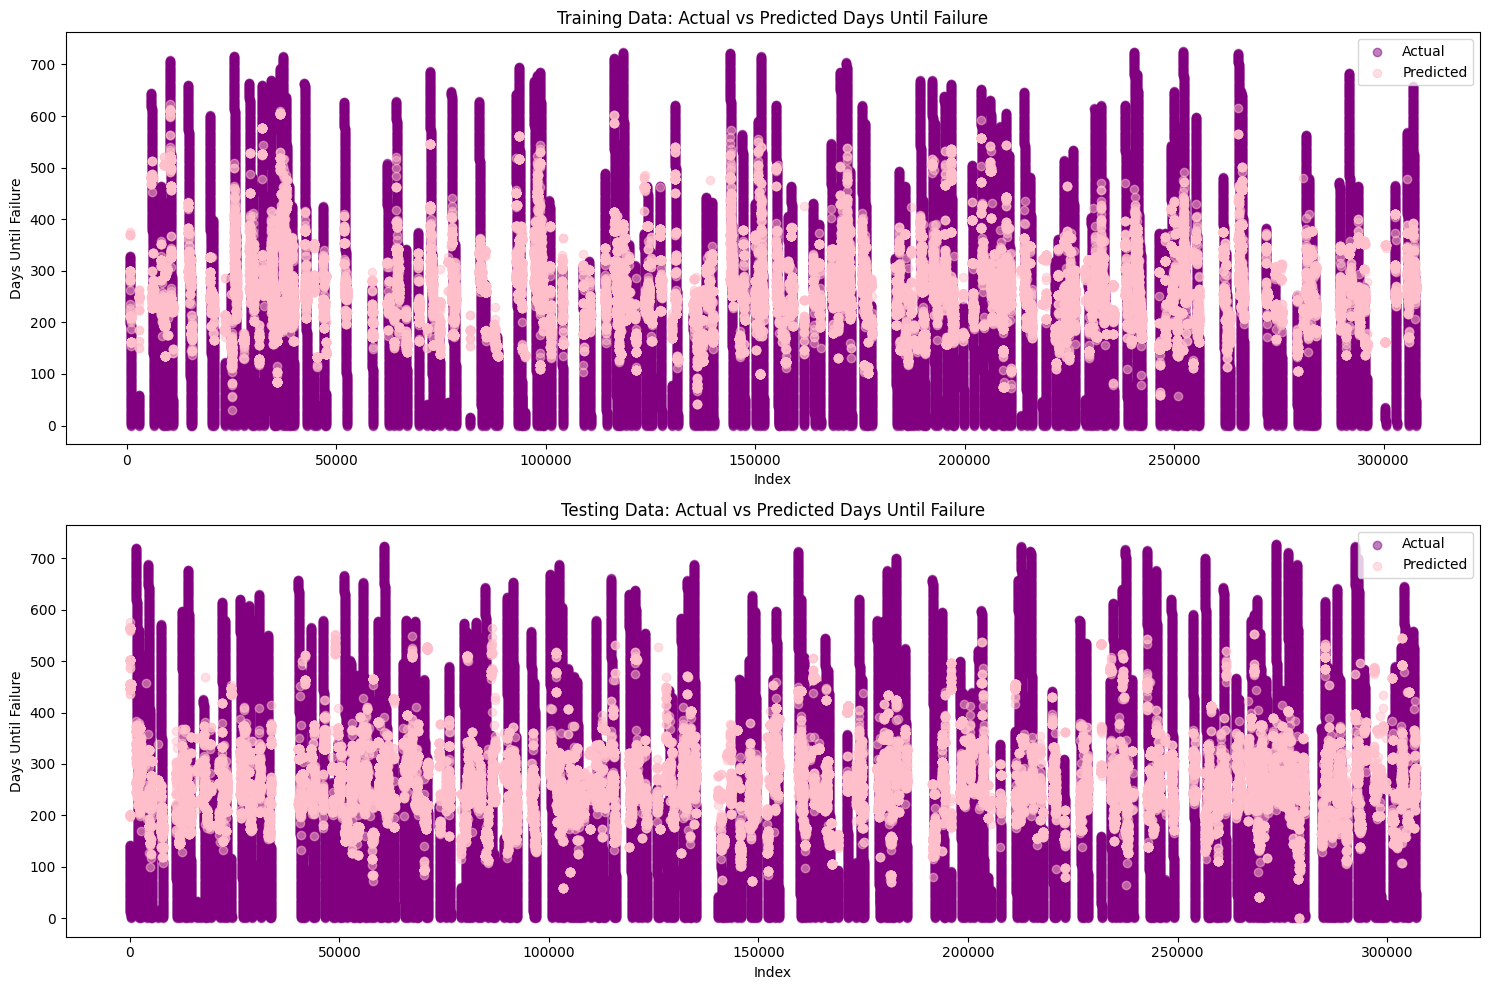

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].scatter(train_df.index, train_df[target], color='purple', label='Actual', alpha=0.5)
ax[0].scatter(train_df.index, train_preds, color='pink', label='Predicted', alpha=0.5)
ax[0].set_title('Training Data: Actual vs Predicted Days Until Failure')
ax[0].legend()
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Days Until Failure')
ax[1].scatter(test_df.index, test_df[target], color='purple', label='Actual', alpha=0.5)
ax[1].scatter(test_df.index, test_preds, color='pink', label='Predicted', alpha=0.5)
ax[1].set_title('Testing Data: Actual vs Predicted Days Until Failure')
ax[1].legend()
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Days Until Failure')
plt.tight_layout()
plt.show()

Using XGBRegressor but with cross validations: Cross-validation is a technique used in machine learning to assess the performance of a model and its generalization ability. The goal of cross-validation is to provide a more reliable estimate of the model's performance by splitting the dataset into multiple subsets, training the model on some subsets (called training sets), and evaluating it on the remaining subsets (called validation sets). This process is repeated several times, and the performance metrics from each iteration are averaged to obtain a more robust estimate of the model's performance.


In [ ]:
from sklearn.model_selection import cross_val_score
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, features)], remainder='passthrough')
model = xgb.XGBRegressor(
    n_estimators=700,
    max_depth=5,
    learning_rate=0.05,
    random_state=42
)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
scores = cross_val_score(pipeline, train_df[features], train_df[target], cv=5, scoring='neg_root_mean_squared_error')
average_rmse = -scores.mean()
print(f"Average RMSE: {average_rmse}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/pytho

Average RMSE: 190.1288746379086


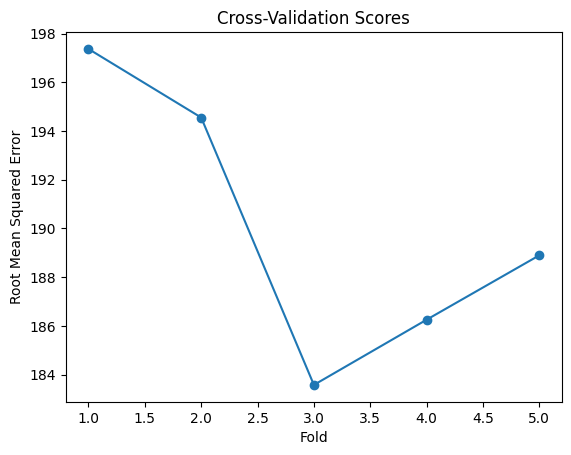

In [ ]:
scores = -scores
fig, ax = plt.subplots()
ax.plot(range(1, len(scores) + 1), scores, marker='o')
ax.set_xlabel('Fold')
ax.set_ylabel('Root Mean Squared Error')
ax.set_title('Cross-Validation Scores')

plt.show()

To run random forest regressor, we need either a stronger gpu, or we need to have a smaller database. So thats what we will do. Lets split the df, to include only a few observations.
---



In [ ]:
import random
random_ids = random.sample(list(df['ID'].unique()), k=100)
filtered_df = df[df['ID'].isin(random_ids)].copy()
print(len(filtered_df))

37259


Here random Forest regressor is used to perform regression and to predict the value of Time to failure.
he Random Forest Regressor is an ensemble learning algorithm that belongs to the family of Decision Tree-based methods. It builds multiple decision trees and aggregates their predictions to make a more accurate and robust regression model. The main idea behind the Random Forest Regressor is to reduce overfitting and increase prediction accuracy by combining the predictions of multiple weak learners (individual decision trees) rather than relying on a single complex model.
For each tree in the forest, a random sample of the training data is taken, with replacement. This process is known as "bootstrap sampling" or "bagging." The size of the sample is typically the same as the original dataset, but some instances may be repeated, and others may be left out. This random sampling ensures that each tree has a slightly different subset of the training data.
At each split of a decision tree, a random subset of features is considered. The number of features considered at each split is a hyperparameter and is usually much smaller than the total number of features in the dataset. This process is called "random feature selection" or "feature bagging.
Each tree in the Random Forest is grown independently and fully, following the regular decision tree building process. The trees are usually deep and can capture complex relationships between features.

Here, 80% of the data is used for training (X_train and y_train), and the remaining 20% is used for testing (X_test and y_test). The random_state parameter is set to 42 to ensure reproducibility.
Predict is used to predict values. It compares the prediction to the actual test values and reduces the RMSE as much as possible.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
train_ids = random_ids[:45]
test_ids = random_ids[45:]
train = filtered_df[filtered_df['ID'].isin(train_ids)]
test = filtered_df[filtered_df['ID'].isin(test_ids)]
features = ['S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']
target = 'TIME_TO_FAILURE'
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 196.869394542679


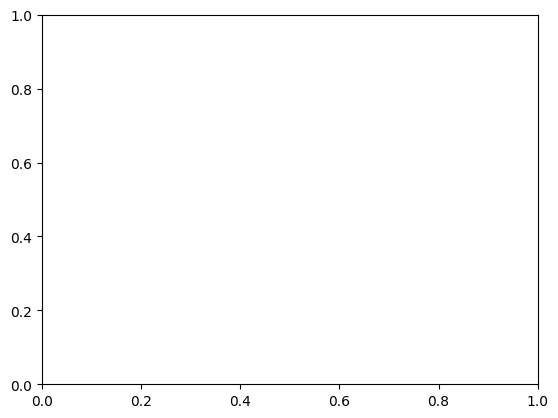

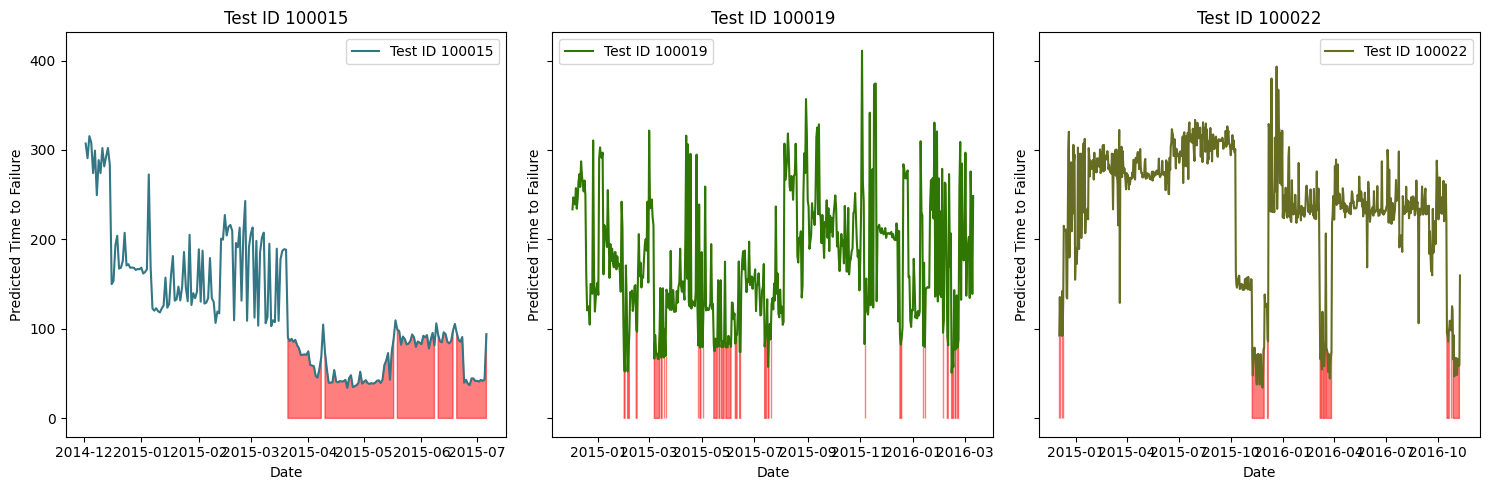

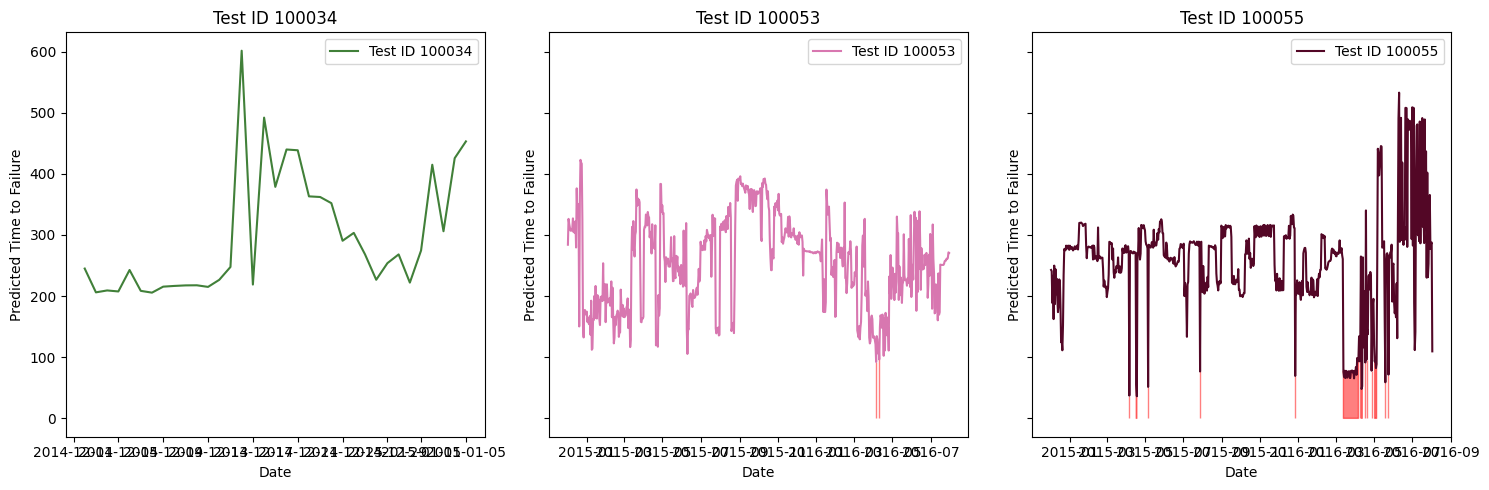

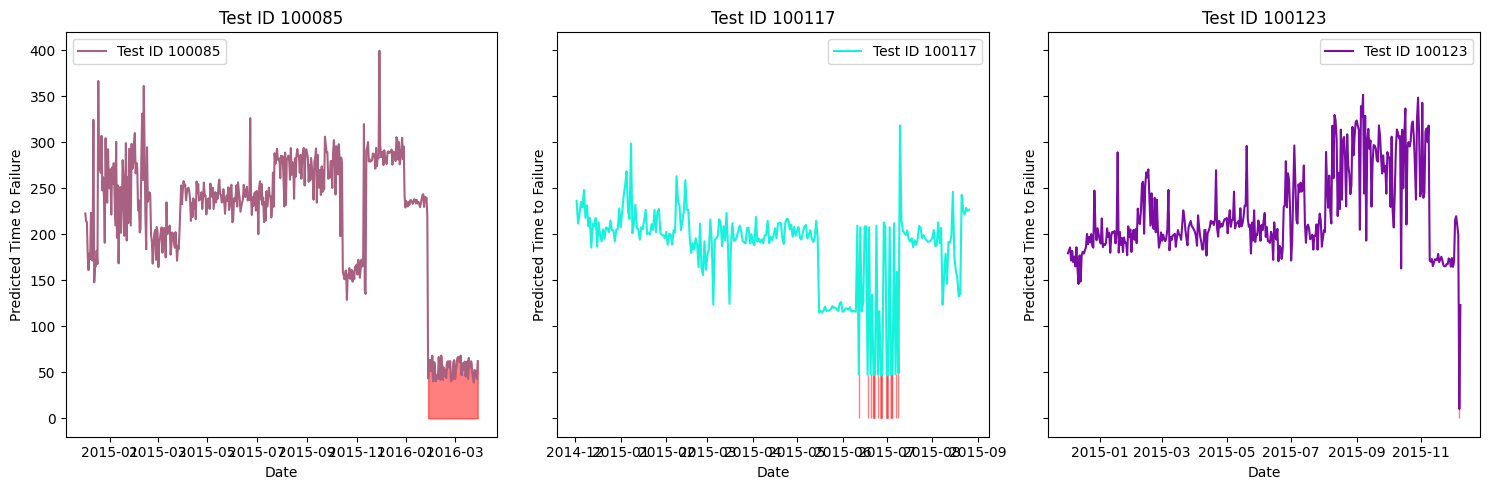

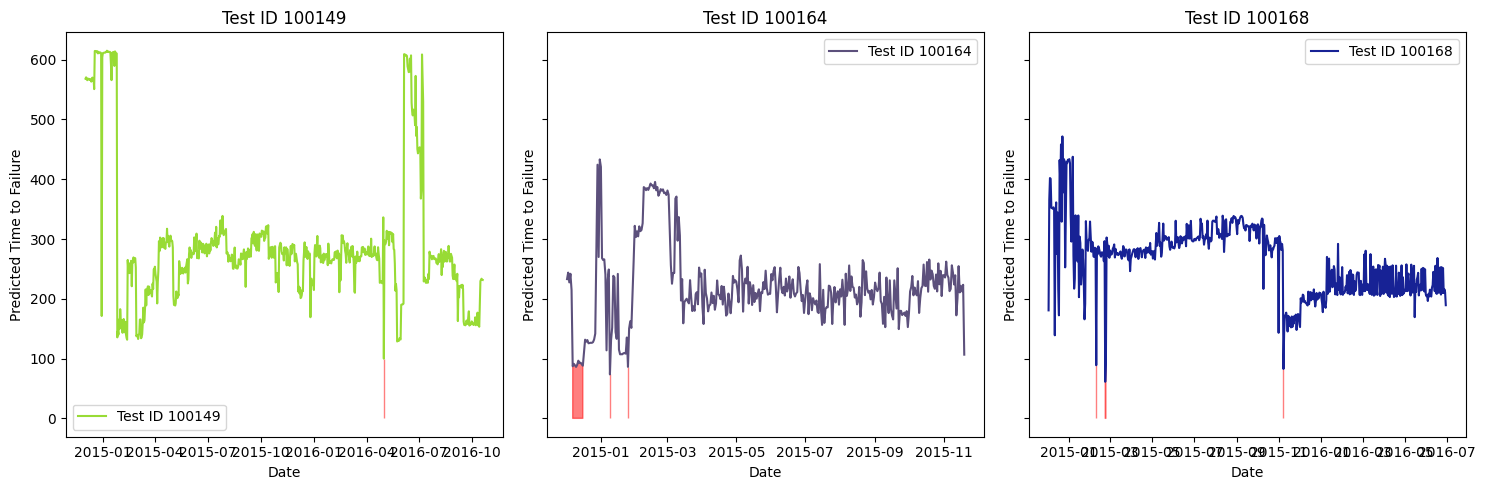

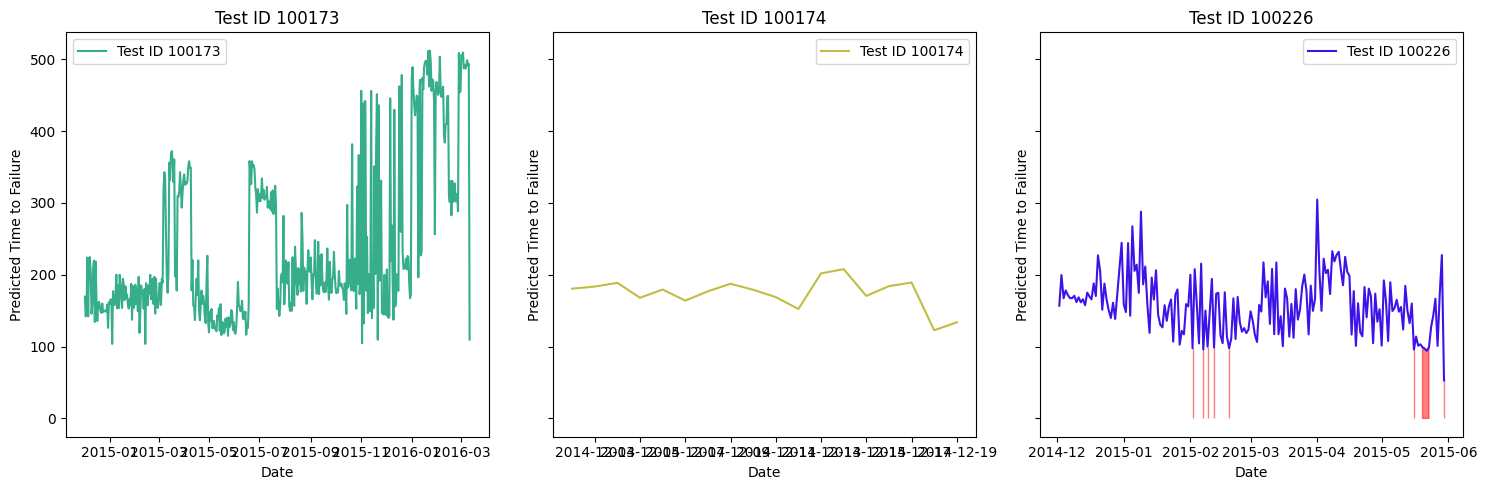

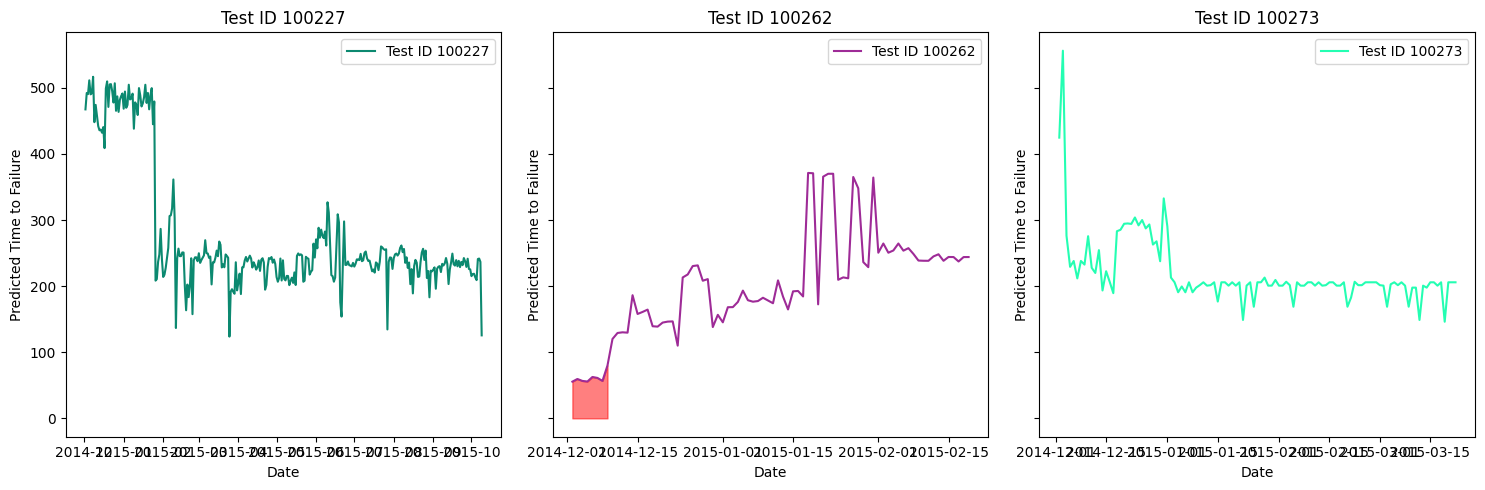

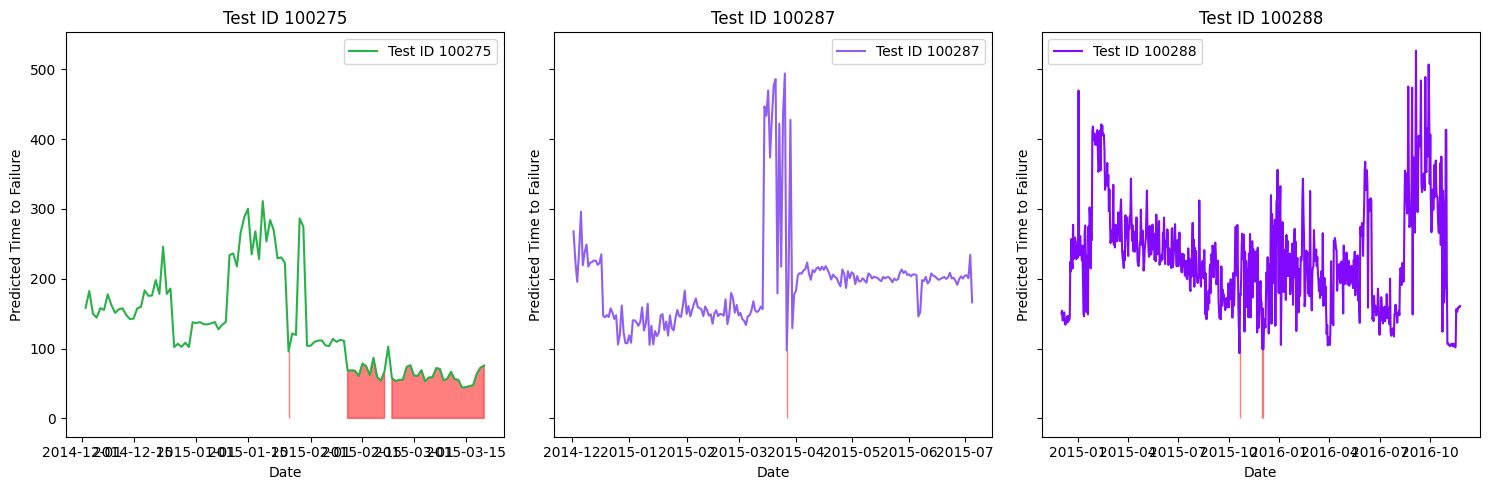

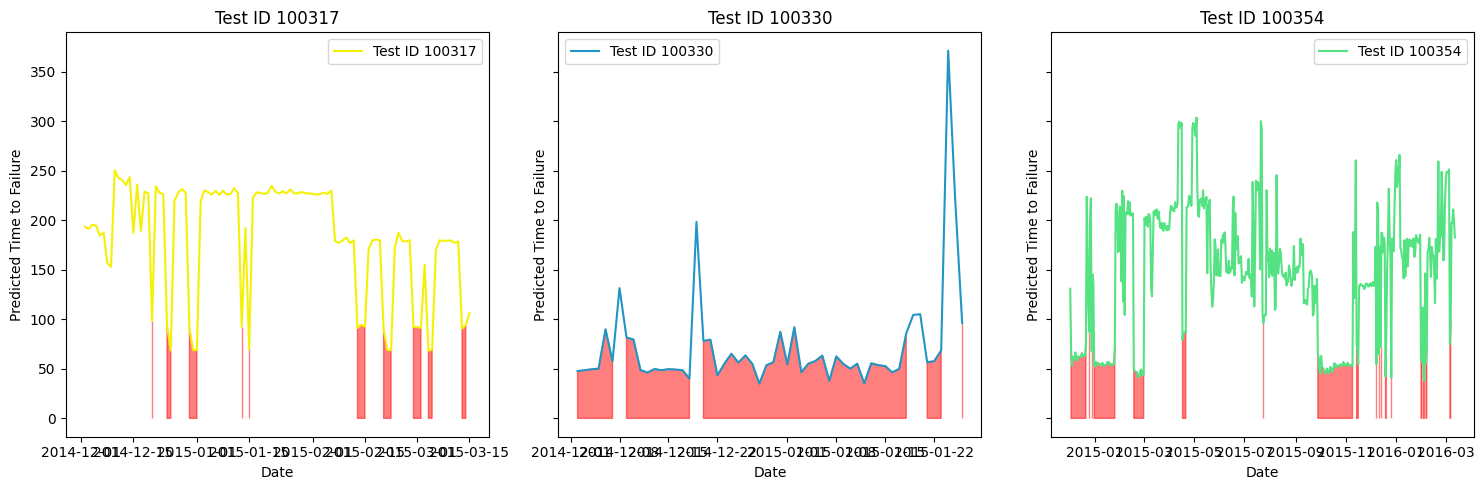

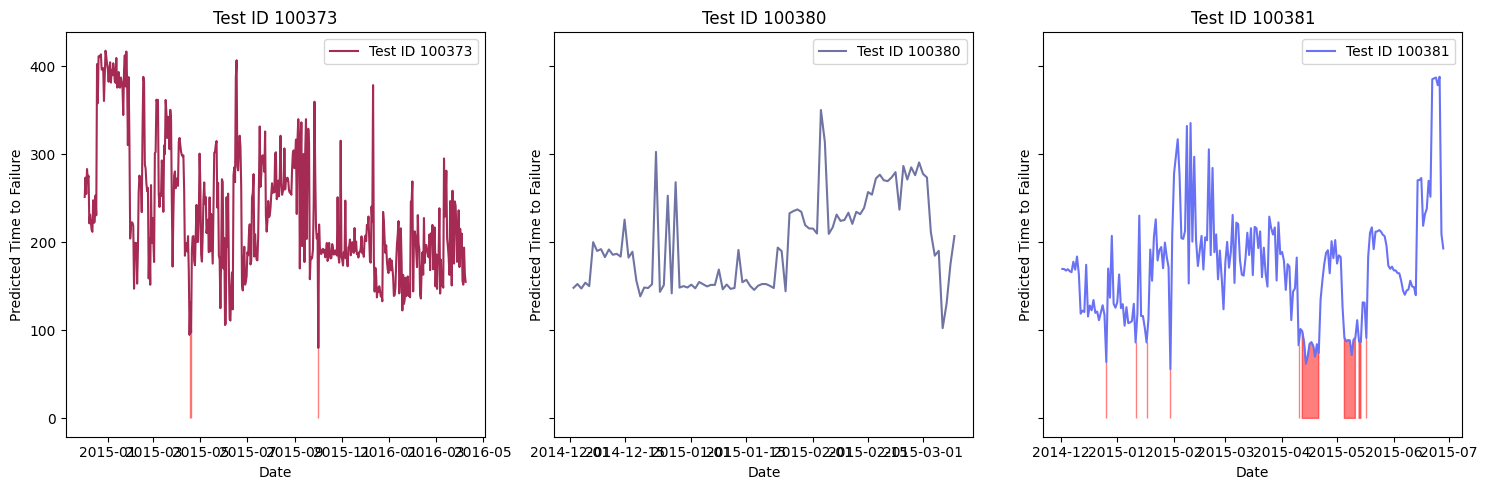

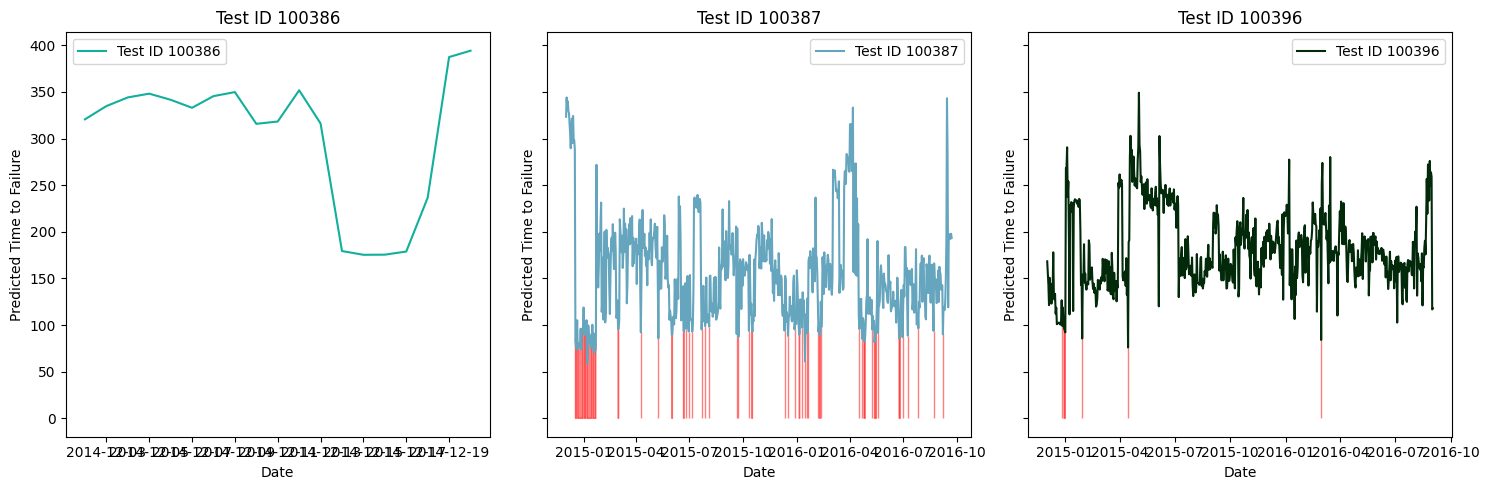

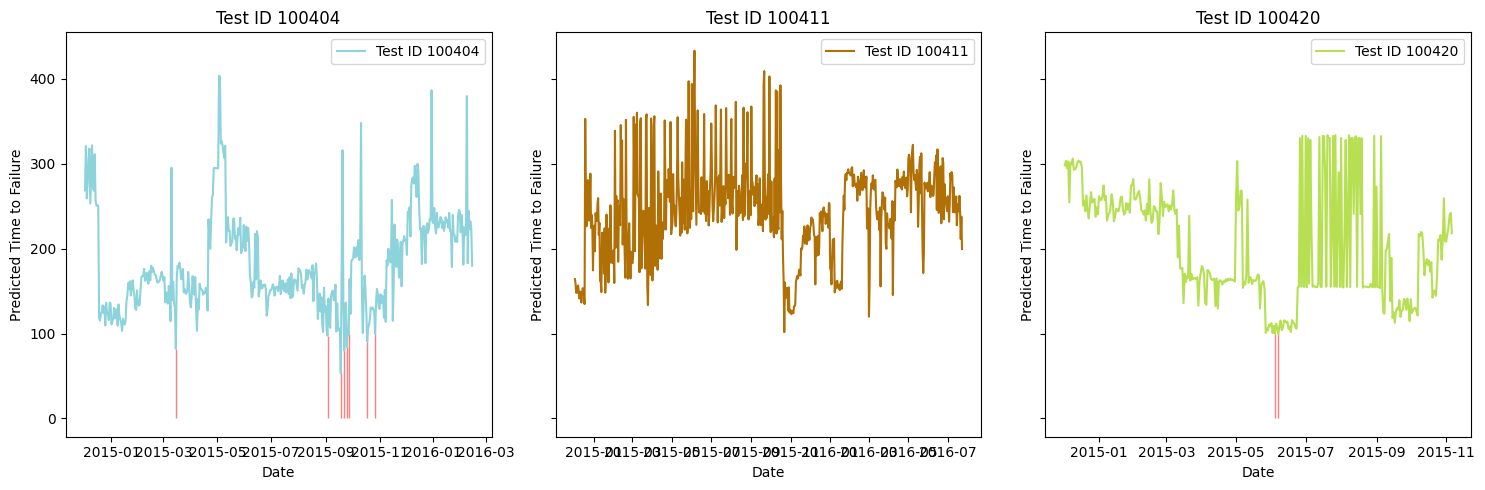

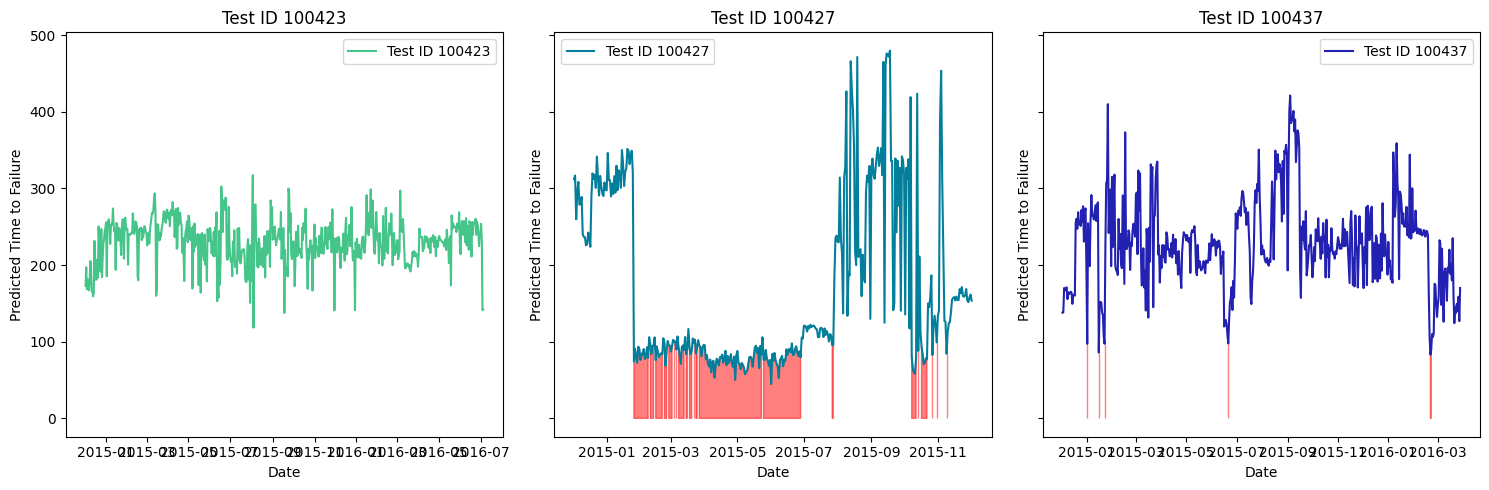

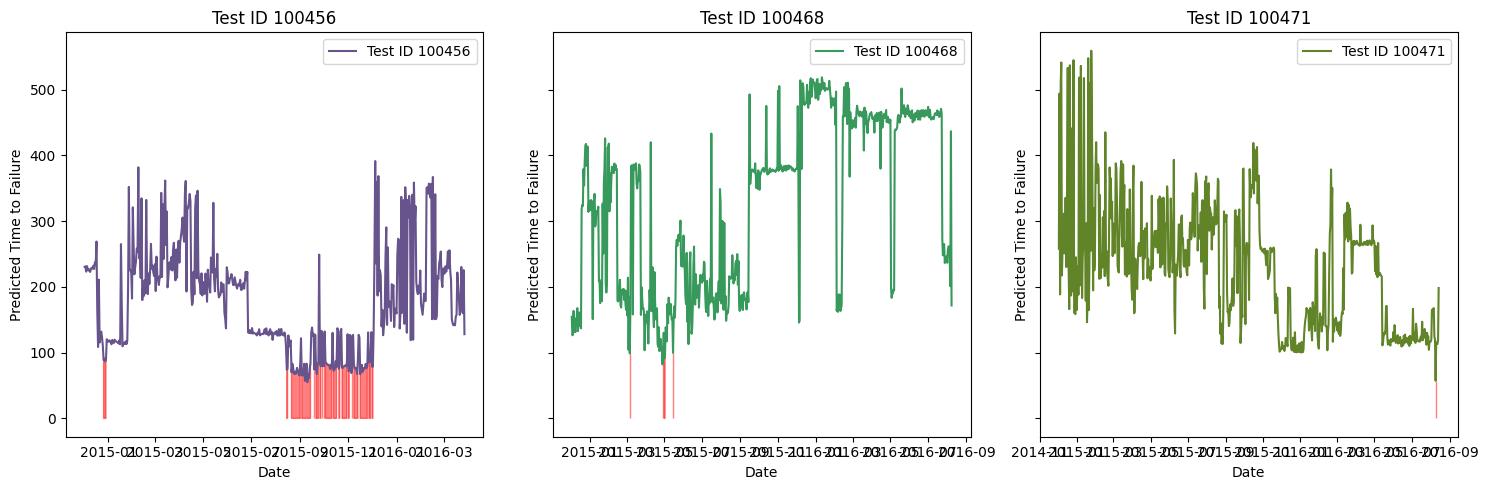

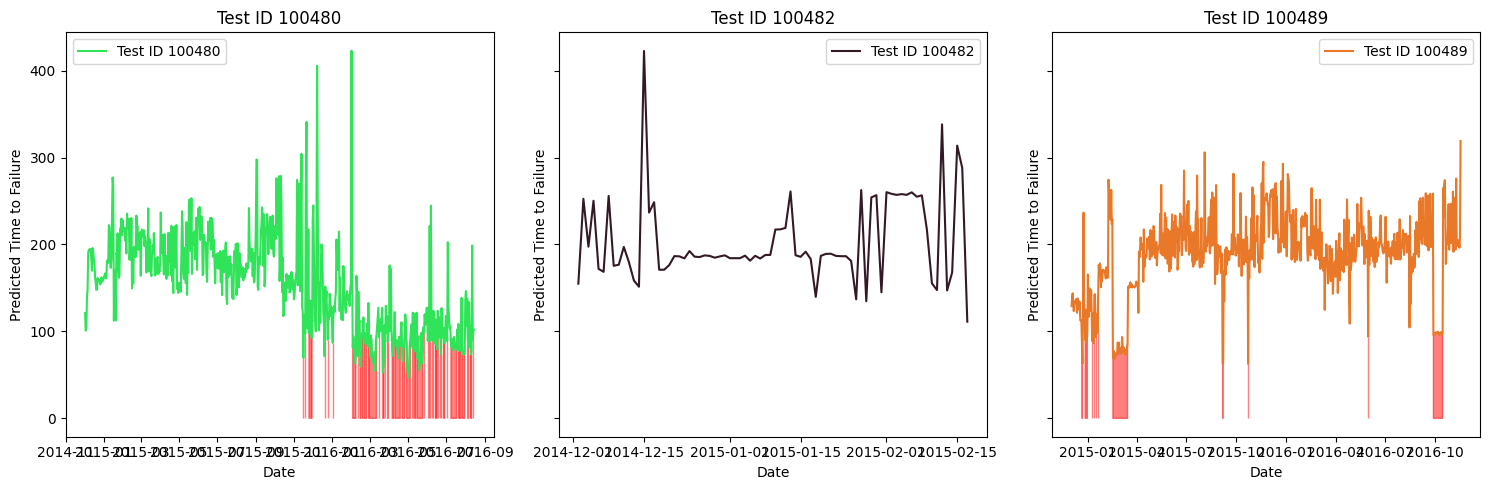

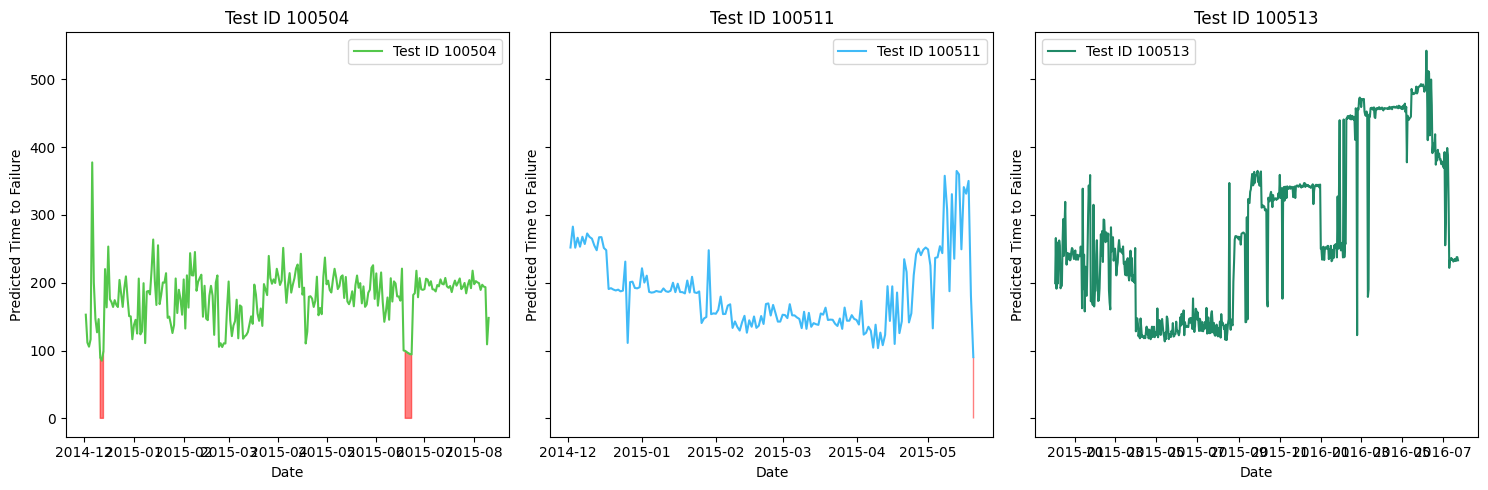

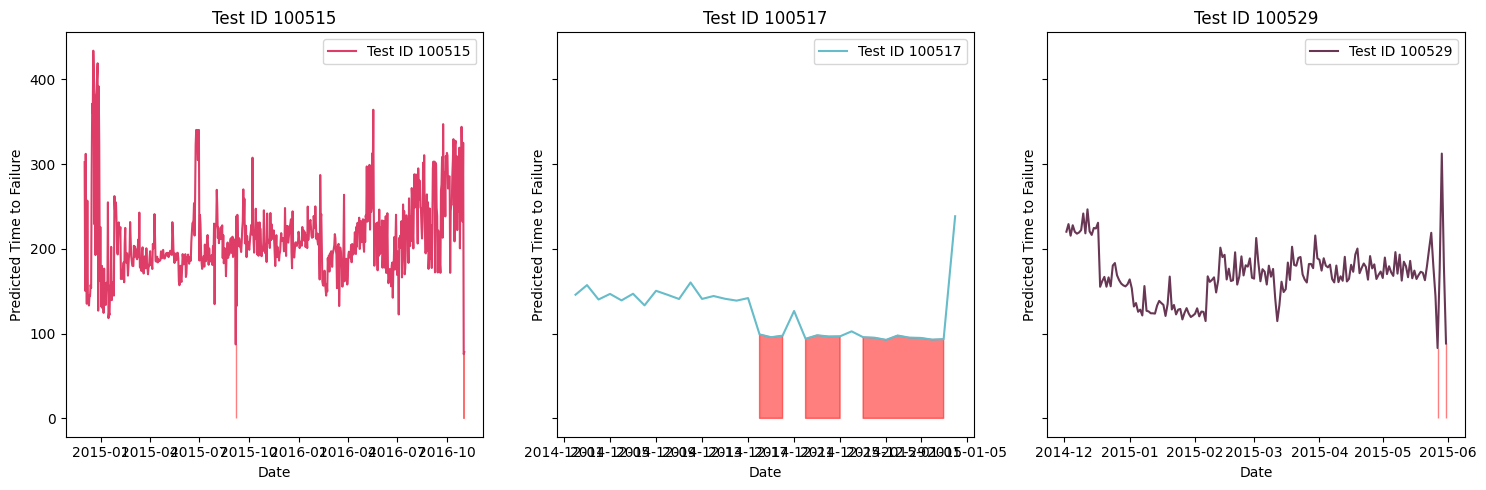

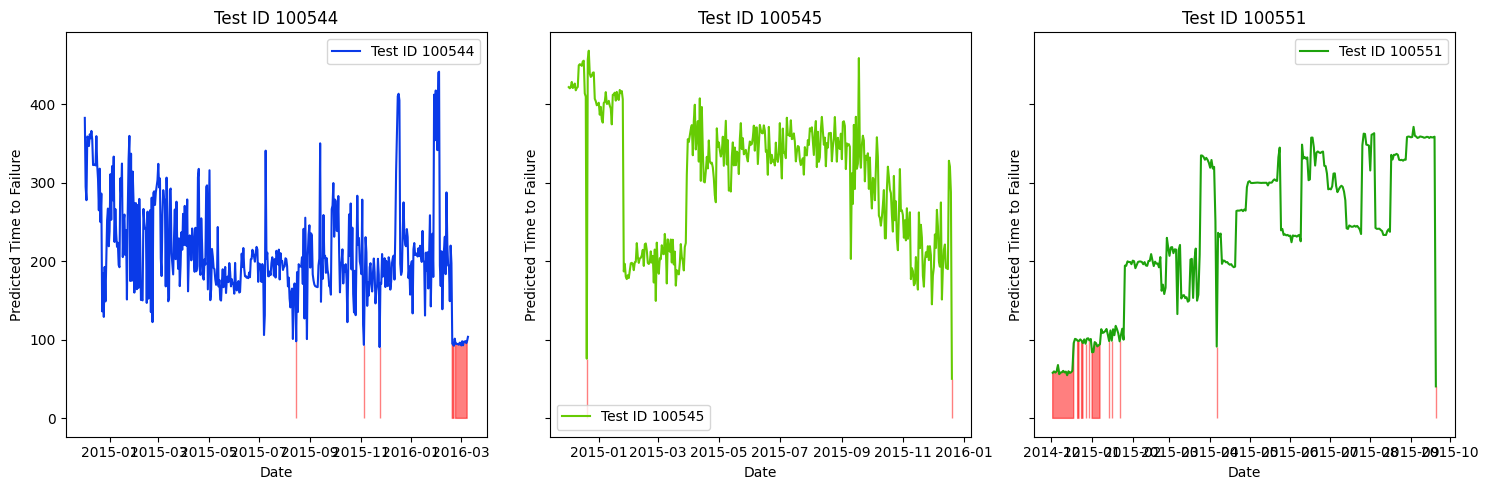

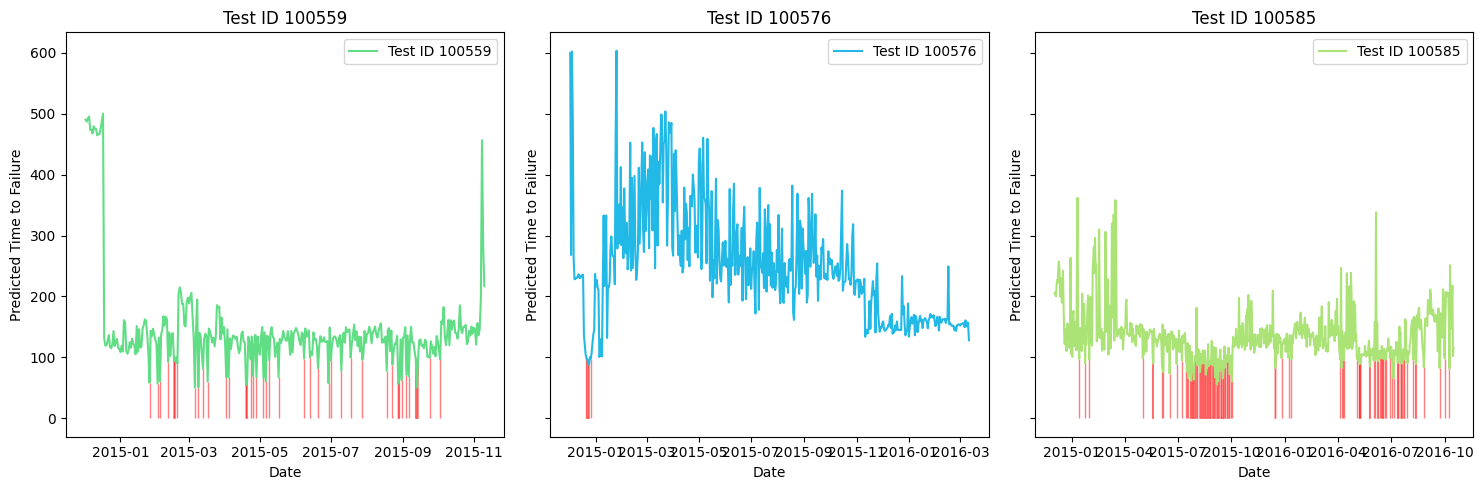

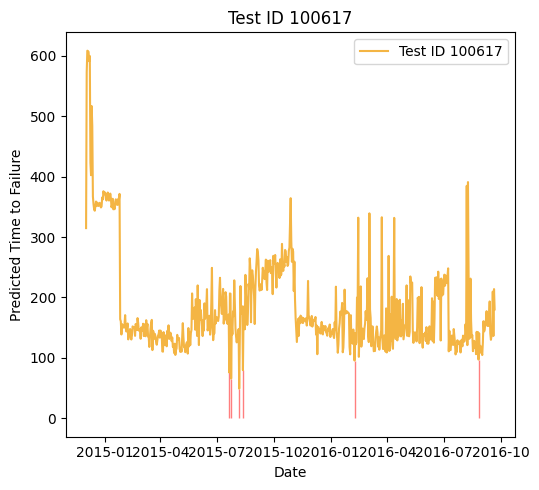

In [ ]:
fig, ax = plt.subplots()
test_with_predictions = test.copy()
test_with_predictions['PREDICTIONS'] = predictions

num_ids_per_plot = 3
ids_per_row = 3
sorted_test_ids = sorted(test_ids)
num_figures = int(np.ceil(len(sorted_test_ids) / num_ids_per_plot))

for i in range(num_figures):
    start_index = i * num_ids_per_plot
    end_index = min((i+1) * num_ids_per_plot, len(sorted_test_ids))
    ids_for_this_figure = sorted_test_ids[start_index:end_index]
    fig, axs = plt.subplots(1, ids_per_row, figsize=(15, 5), sharey=True)
    for j, id in enumerate(ids_for_this_figure):
        data = test_with_predictions[test_with_predictions['ID'] == id]
        color = np.random.rand(3,)  # Random color
        axs[j].plot(data['DATE'], data['PREDICTIONS'], label=f'Test ID {id}', color=color)
        axs[j].fill_between(data['DATE'], data['PREDICTIONS'], where=(data['PREDICTIONS']<100), color='red', alpha=0.5)
        axs[j].set_xlabel('Date')
        axs[j].set_ylabel('Predicted Time to Failure')
        axs[j].set_title(f'Test ID {id}')
        axs[j].legend()
    for k in range(j+1, ids_per_row):
        fig.delaxes(axs[k])

    plt.tight_layout()
    plt.show()



Ideally time to failure should be a constantly reducing graph, with the time failure being less than 100 showing up in the last 100 days of the observation.

In order to replicate this, I wanted to introduce something that would represent to slope of the graph being constant. That is lag here.

In [ ]:
df['TIME_TO_FAILURE_LAG_1'] = df.groupby('ID')['TIME_TO_FAILURE'].shift(1)
df['TIME_TO_FAILURE_LAG_1'].fillna(0, inplace=True)
df['TIME_TO_FAILURE_LAG_1']


0           0.0
1         143.0
2         142.0
3         141.0
4         140.0
          ...  
307675      5.0
307676      4.0
307677      3.0
307678      2.0
307679      1.0
Name: TIME_TO_FAILURE_LAG_1, Length: 171094, dtype: float64

In [ ]:
import random
random_ids = random.sample(list(df['ID'].unique()), k=100)
filtered_df = df[df['ID'].isin(random_ids)].copy()
train_ids = random_ids[:45]
test_ids = random_ids[45:]
train = filtered_df[filtered_df['ID'].isin(train_ids)]
test = filtered_df[filtered_df['ID'].isin(test_ids)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
features = ['S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8', 'TIME_TO_FAILURE_LAG_1']
target = 'TIME_TO_FAILURE'
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 10.483301950472732


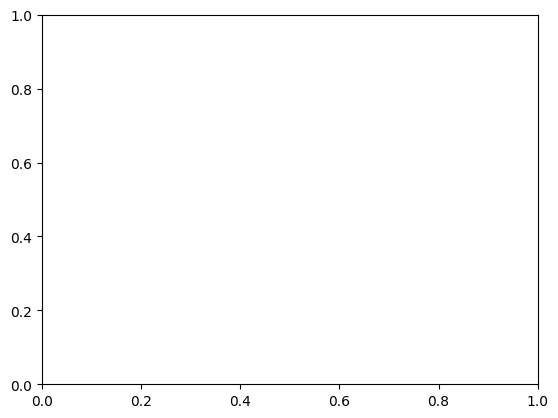

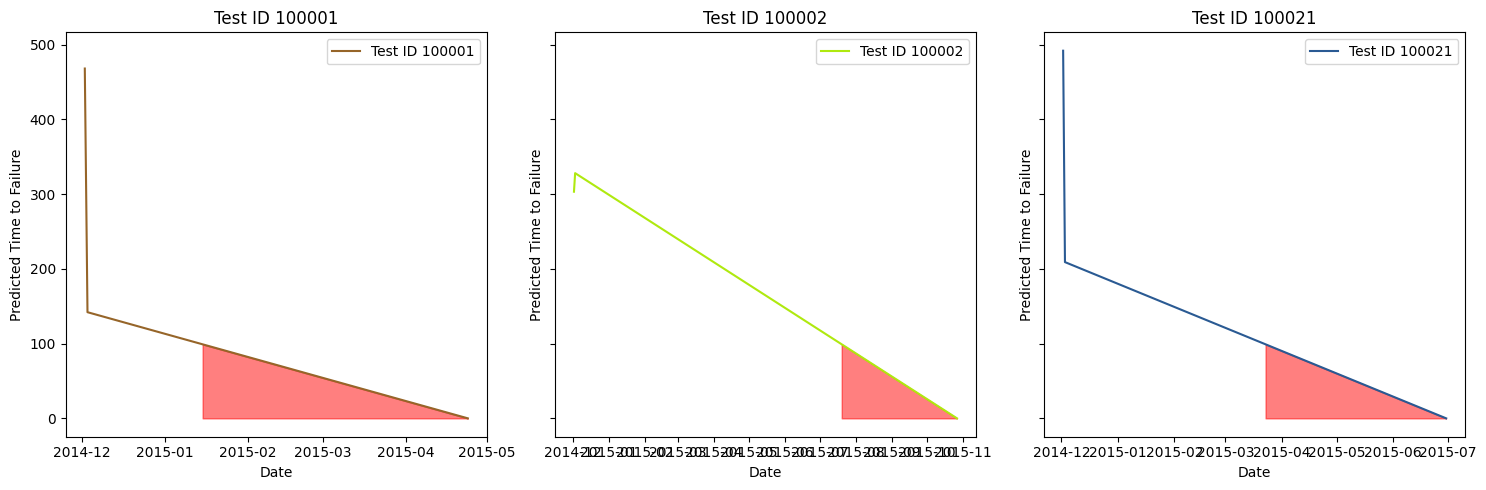

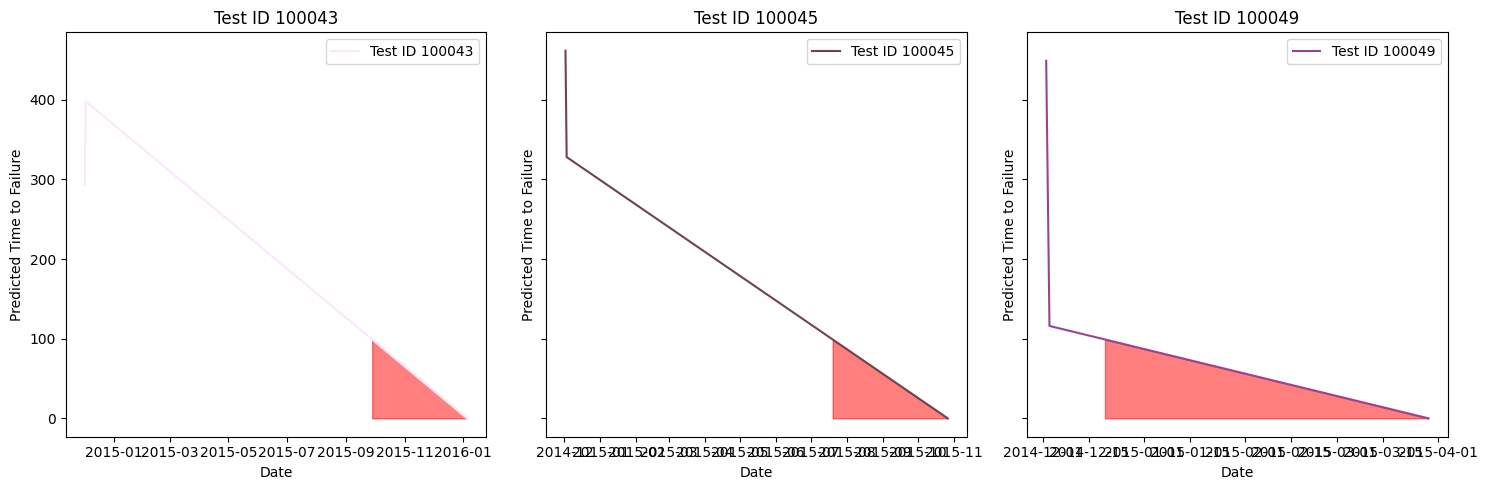

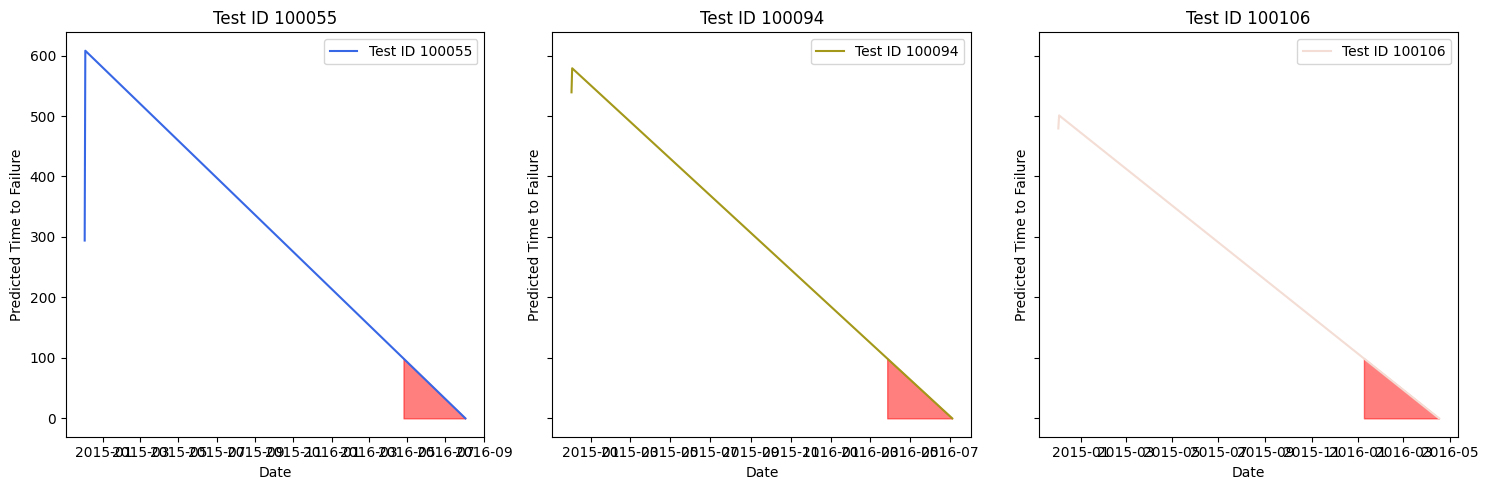

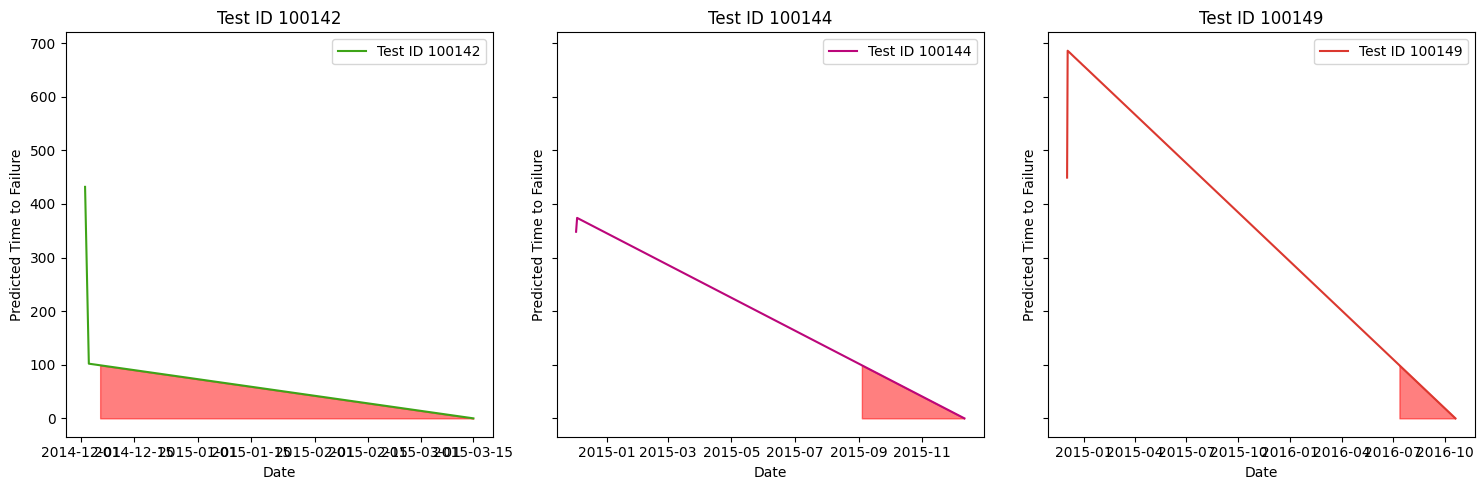

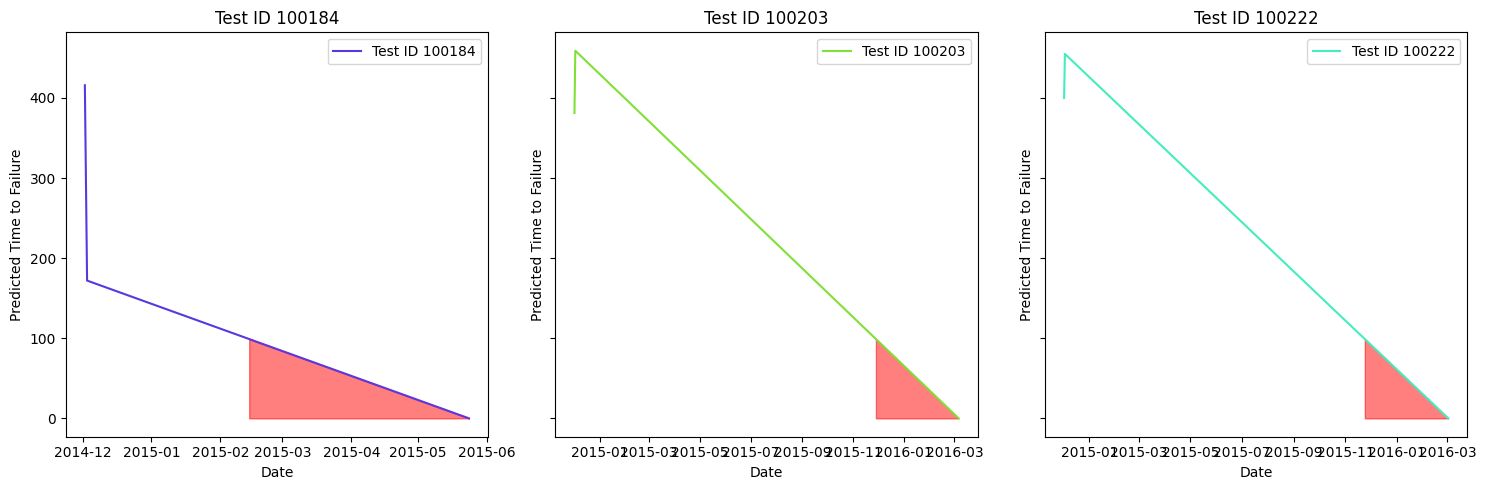

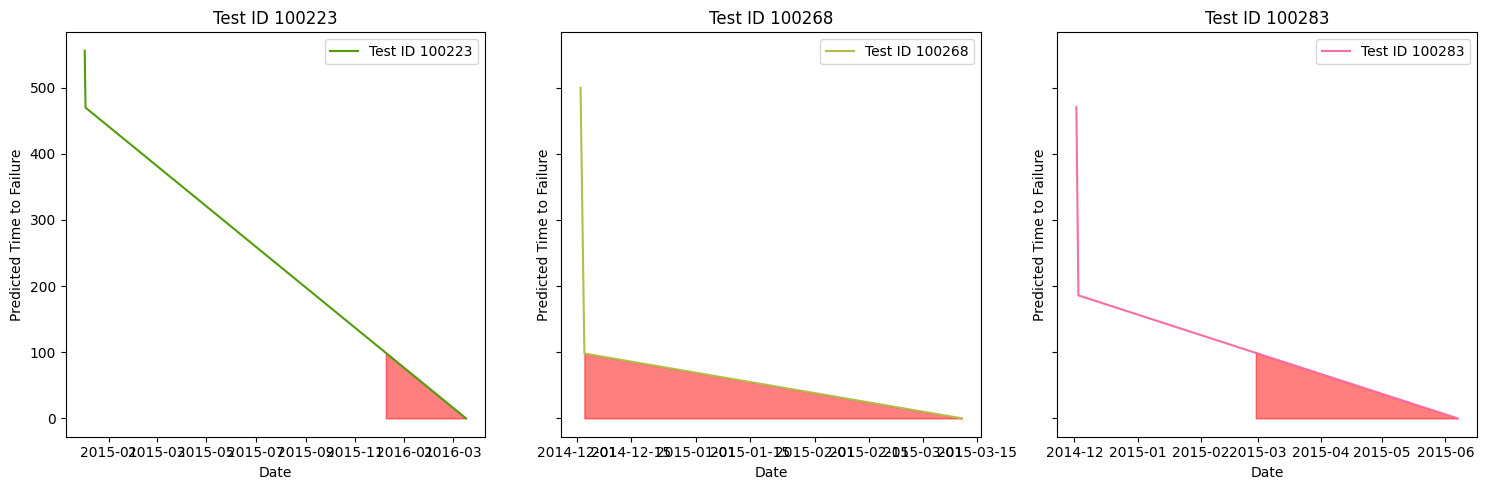

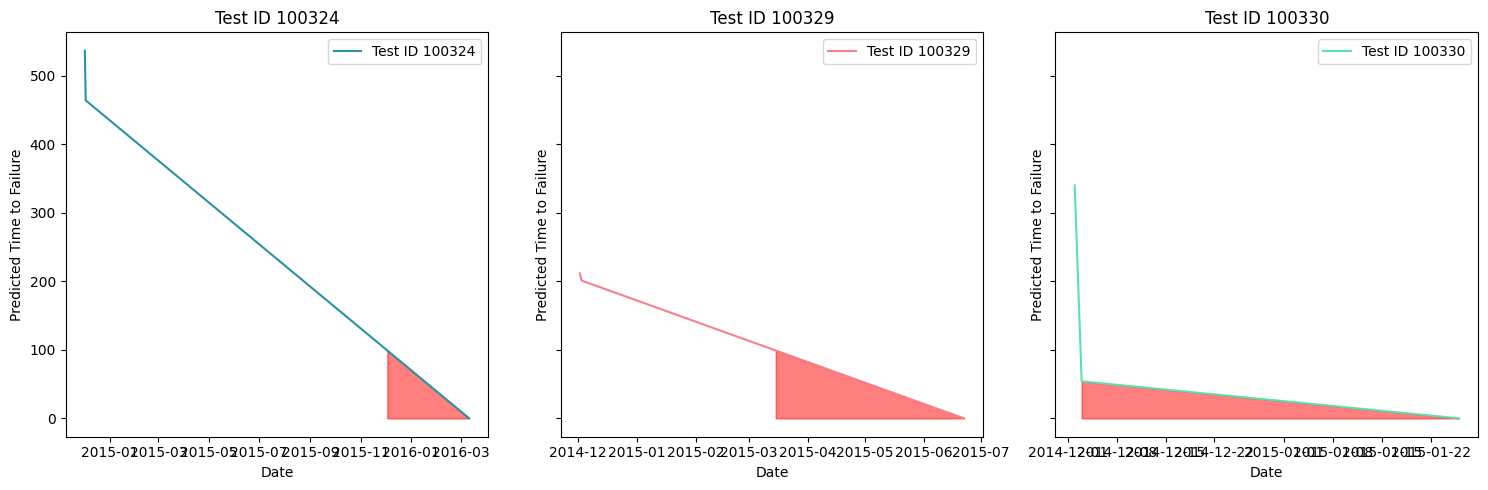

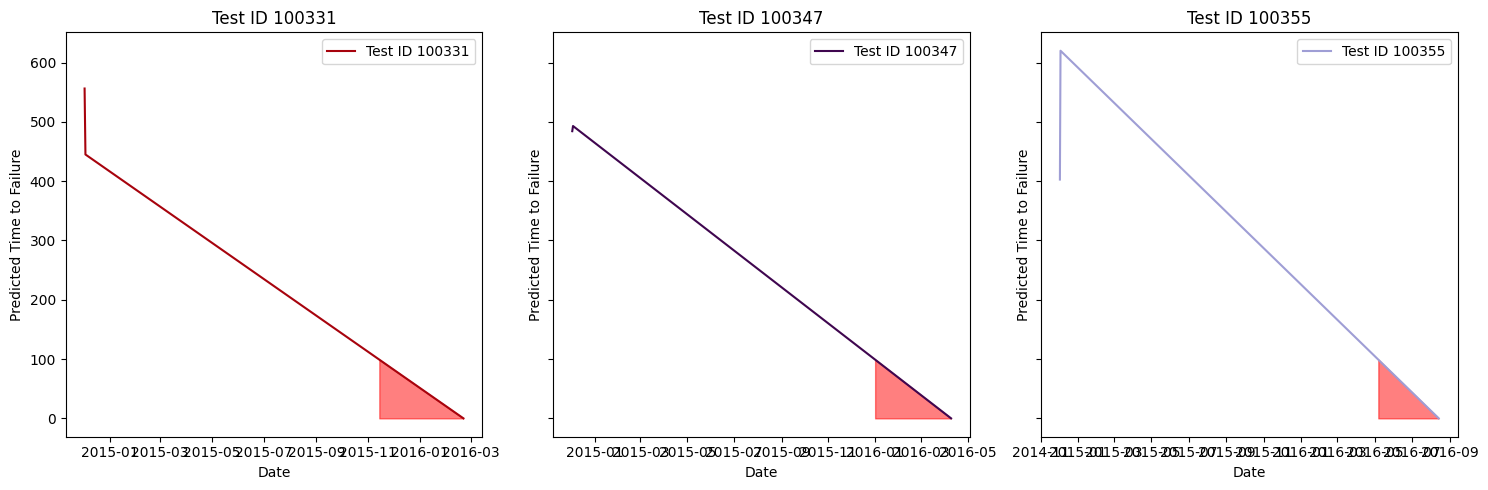

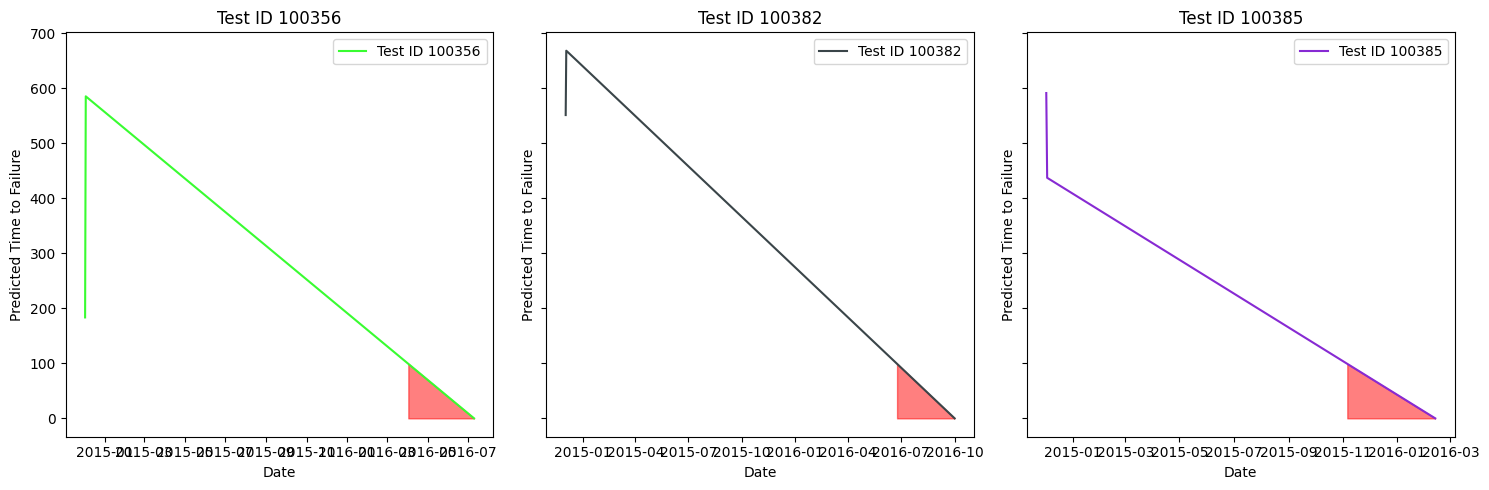

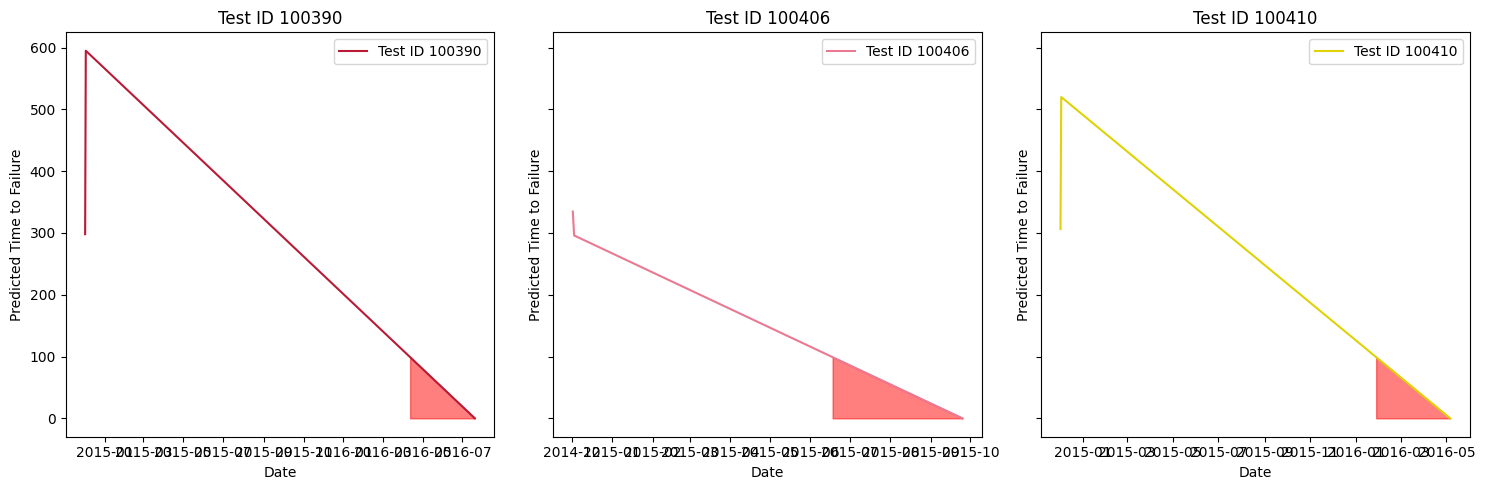

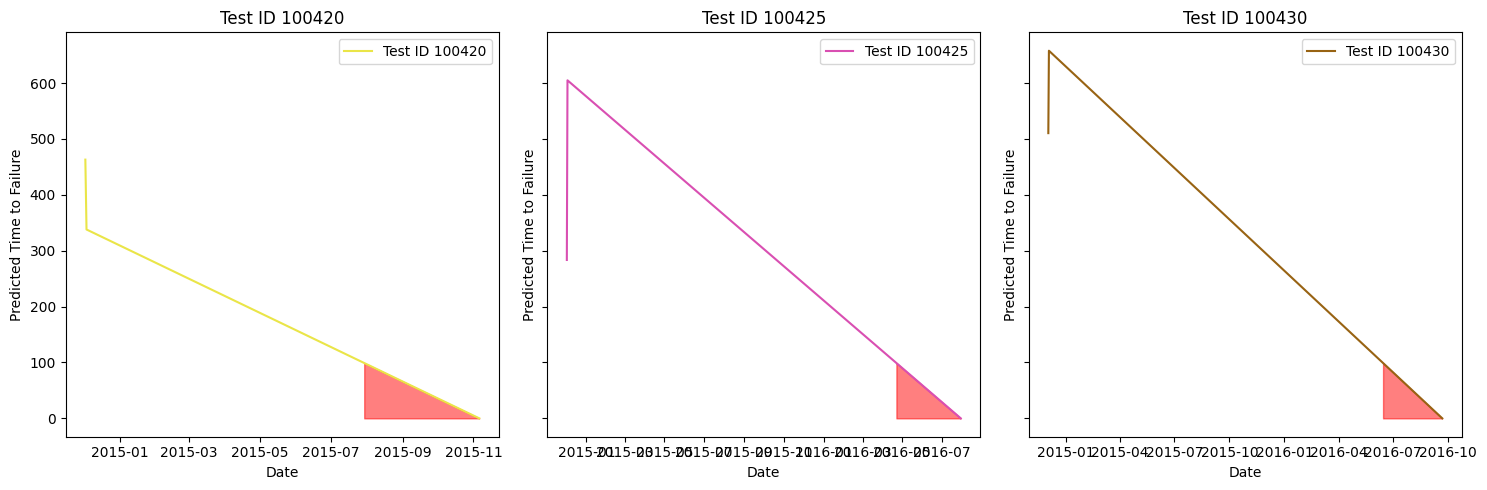

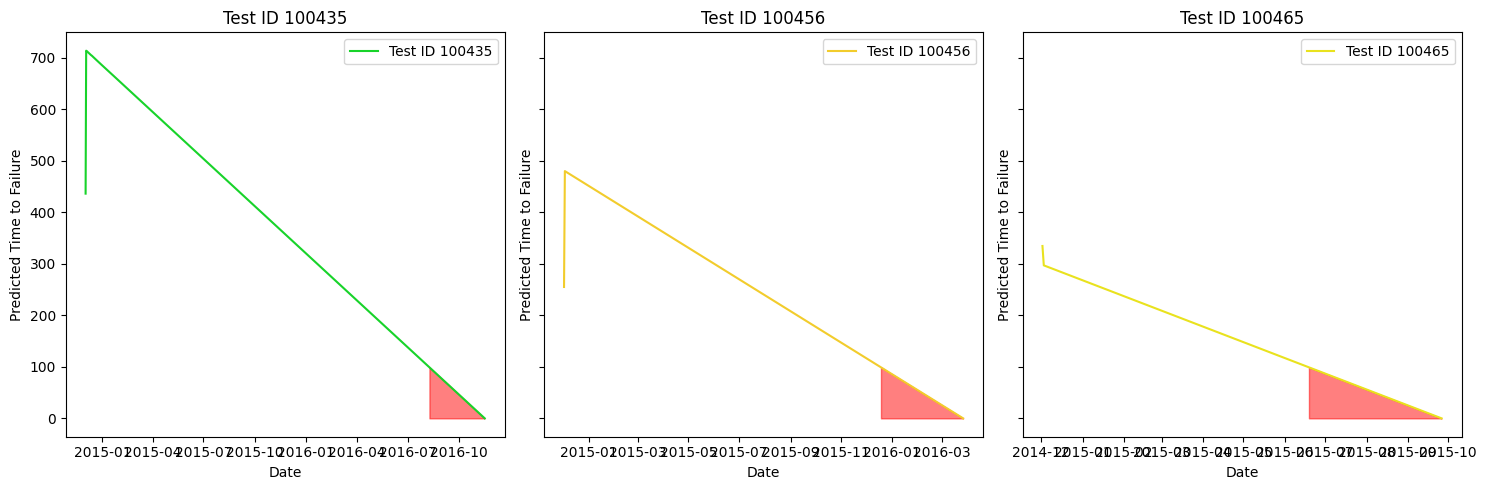

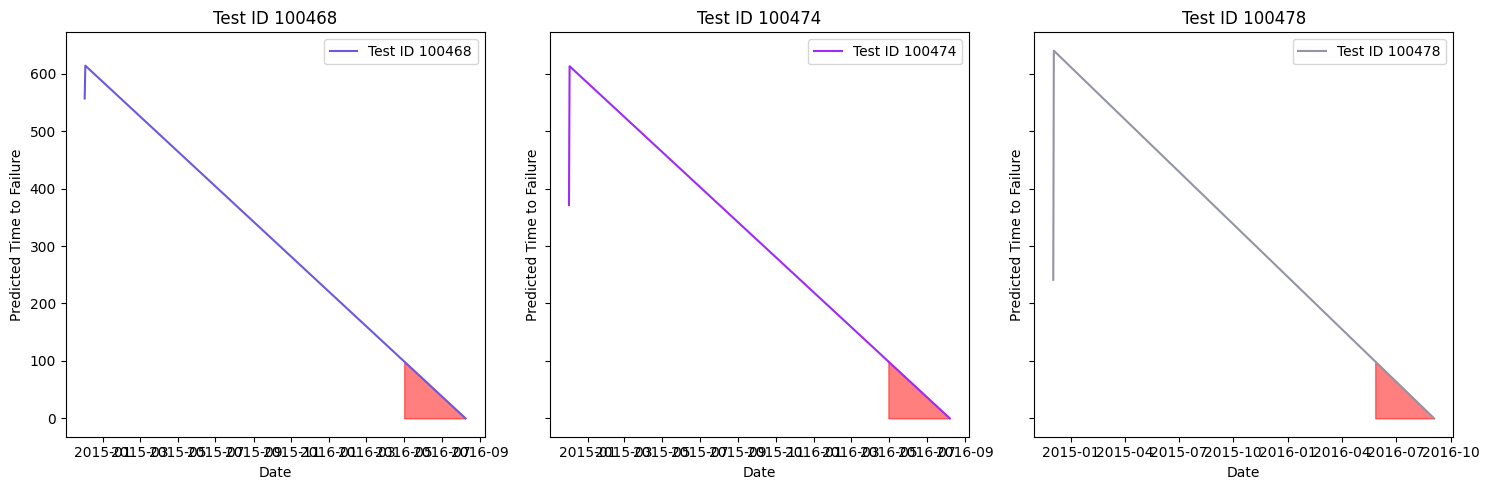

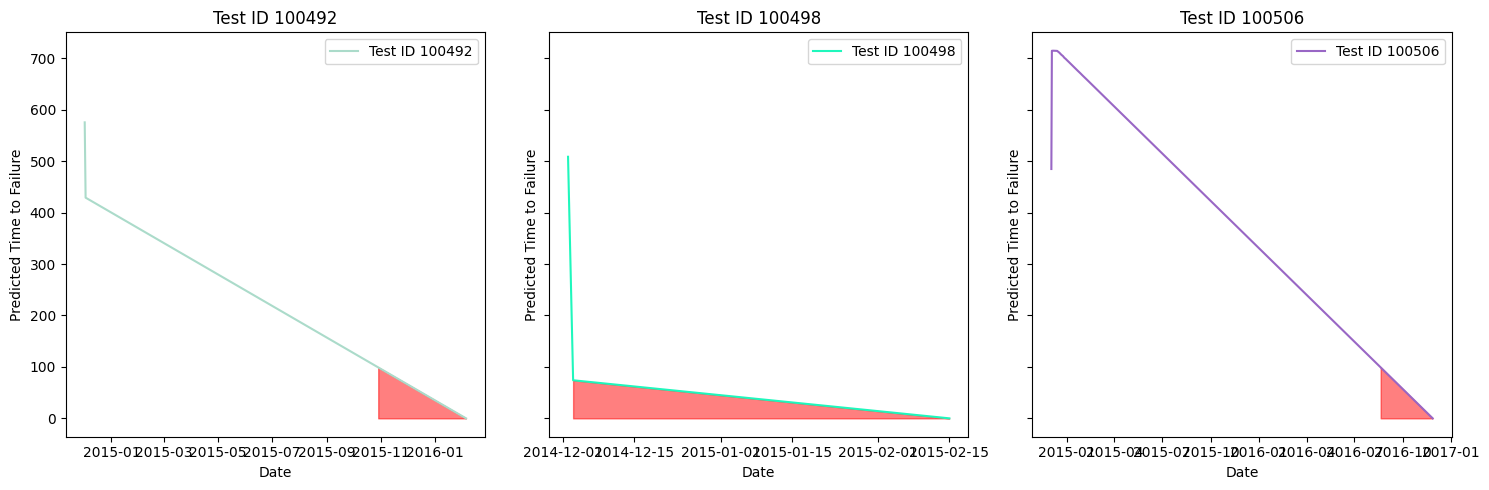

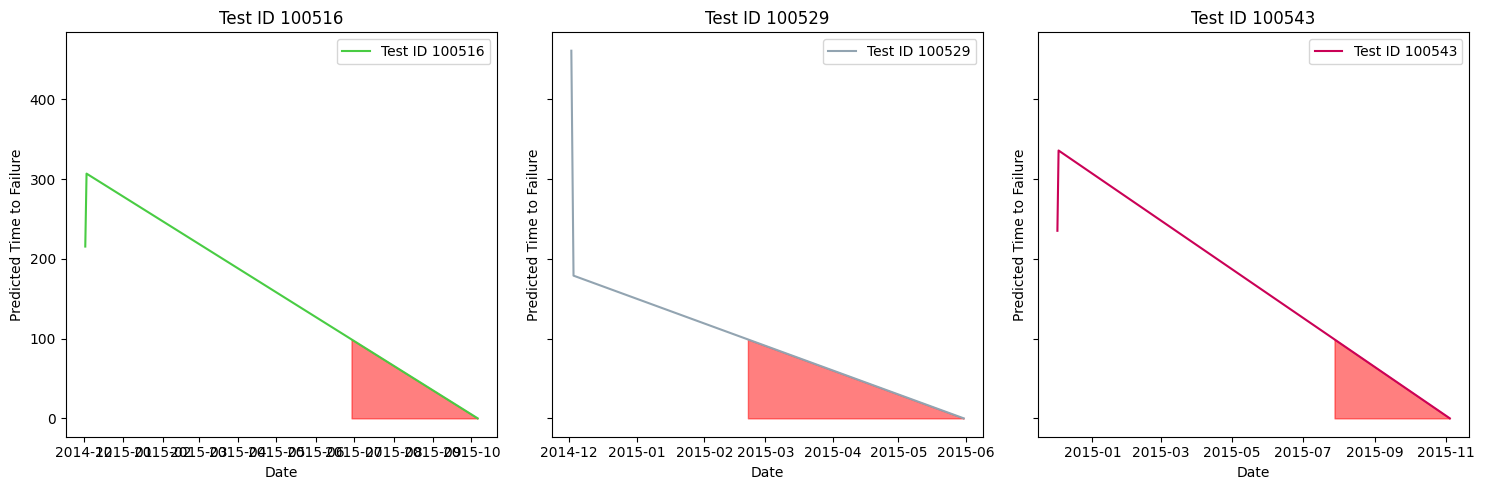

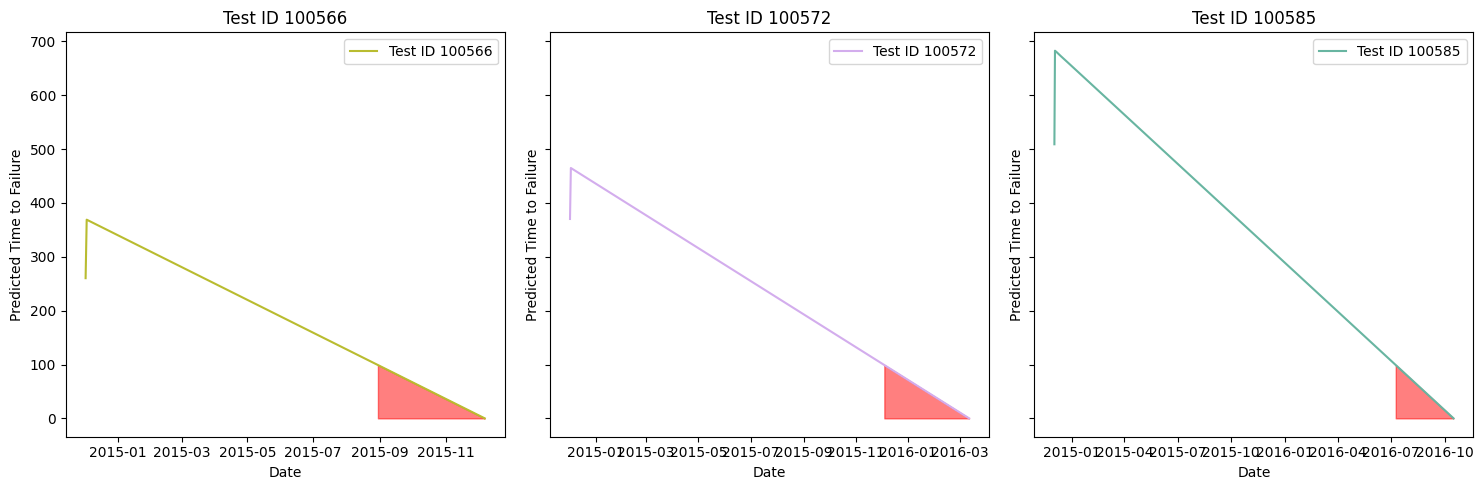

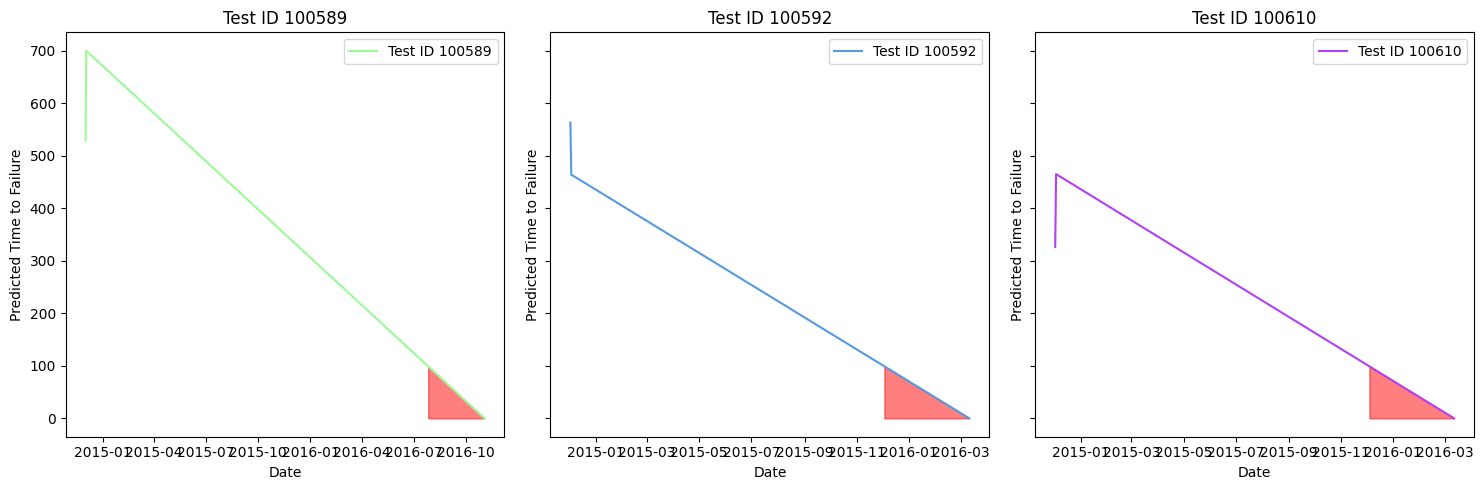

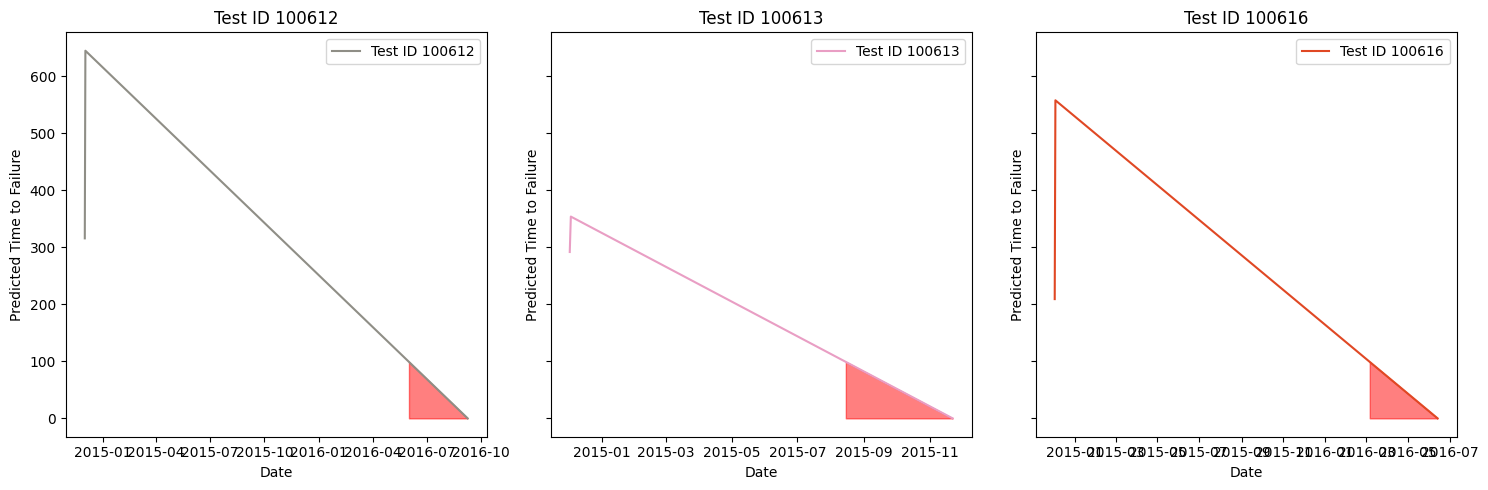

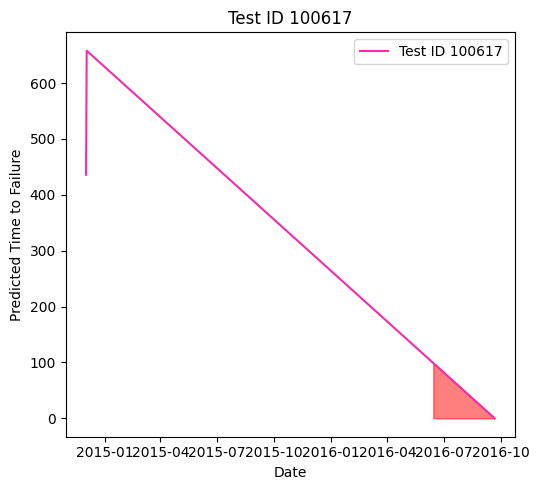

In [ ]:
fig, ax = plt.subplots()
test_with_predictions = test.copy()
test_with_predictions['PREDICTIONS'] = predictions

num_ids_per_plot = 3
ids_per_row = 3
sorted_test_ids = sorted(test_ids)
num_figures = int(np.ceil(len(sorted_test_ids) / num_ids_per_plot))

for i in range(num_figures):
    start_index = i * num_ids_per_plot
    end_index = min((i+1) * num_ids_per_plot, len(sorted_test_ids))
    ids_for_this_figure = sorted_test_ids[start_index:end_index]
    fig, axs = plt.subplots(1, ids_per_row, figsize=(15, 5), sharey=True)
    for j, id in enumerate(ids_for_this_figure):
        data = test_with_predictions[test_with_predictions['ID'] == id]
        color = np.random.rand(3,)
        axs[j].plot(data['DATE'], data['PREDICTIONS'], label=f'Test ID {id}', color=color)
        axs[j].fill_between(data['DATE'], data['PREDICTIONS'], where=(data['PREDICTIONS']<100), color='red', alpha=0.5)
        axs[j].set_xlabel('Date')
        axs[j].set_ylabel('Predicted Time to Failure')
        axs[j].set_title(f'Test ID {id}')
        axs[j].legend()
    for k in range(j+1, ids_per_row):
        fig.delaxes(axs[k])

    plt.tight_layout()
    plt.show()


BUT I see that this properly of telling that the slope is the same  could be seen as leaking information from the future into the past if your goal is to predict 'TIME_TO_FAILURE' only based on the sensor readings ('S15', 'S17', etc.) and not past 'TIME_TO_FAILURE' values.

If we want to consider only data from the sensors, this seems ingenuine, and may not achieve the exact problem.

Hence, we have to find other ways of analyzing this data in order to increase the precision.

One thing we can do is taking the rolling window statistics of sensor data. This could help capture trends and seasonality in the sensor data.

In [ ]:
from sklearn.linear_model import LinearRegression

def calculate_trend(x):
    """Calculate the trend of a series of values."""
    y = x.values.reshape(-1, 1)
    X = np.arange(len(y)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0][0]

window_size = 30


for feature in ['S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']:
    trend = df.groupby('ID')[feature].rolling(window_size).apply(calculate_trend)
    df[f'{feature}_trend'] = trend.reset_index(level=0, drop=True)


for col in df.columns:
    if df[col].dtype == 'timedelta64[ns]':
        df[col].fillna(pd.Timedelta(seconds=0), inplace=True)
    else:
        df[col].fillna(0, inplace=True)


In [ ]:
random_ids = random.sample(list(df['ID'].unique()), k=100)
filtered_df = df[df['ID'].isin(random_ids)].copy()
train_ids = random_ids[:45]
test_ids = random_ids[45:]
train = filtered_df[filtered_df['ID'].isin(train_ids)]
test = filtered_df[filtered_df['ID'].isin(test_ids)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
original_features = ['S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']
rolling_mean_features = [f'{feature}_rolling_mean' for feature in original_features]
rolling_std_features = [f'{feature}_rolling_std' for feature in original_features]
features = original_features + rolling_mean_features + rolling_std_features
target = 'TIME_TO_FAILURE'
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 198.77762012340656


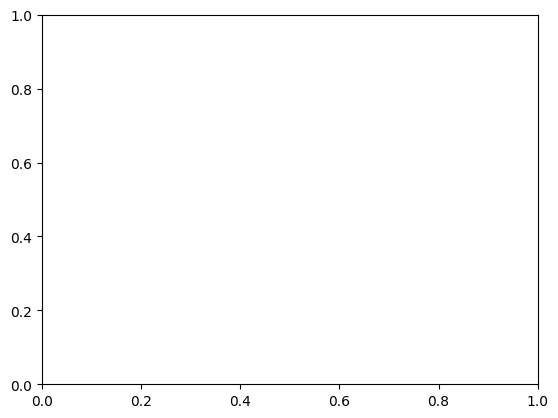

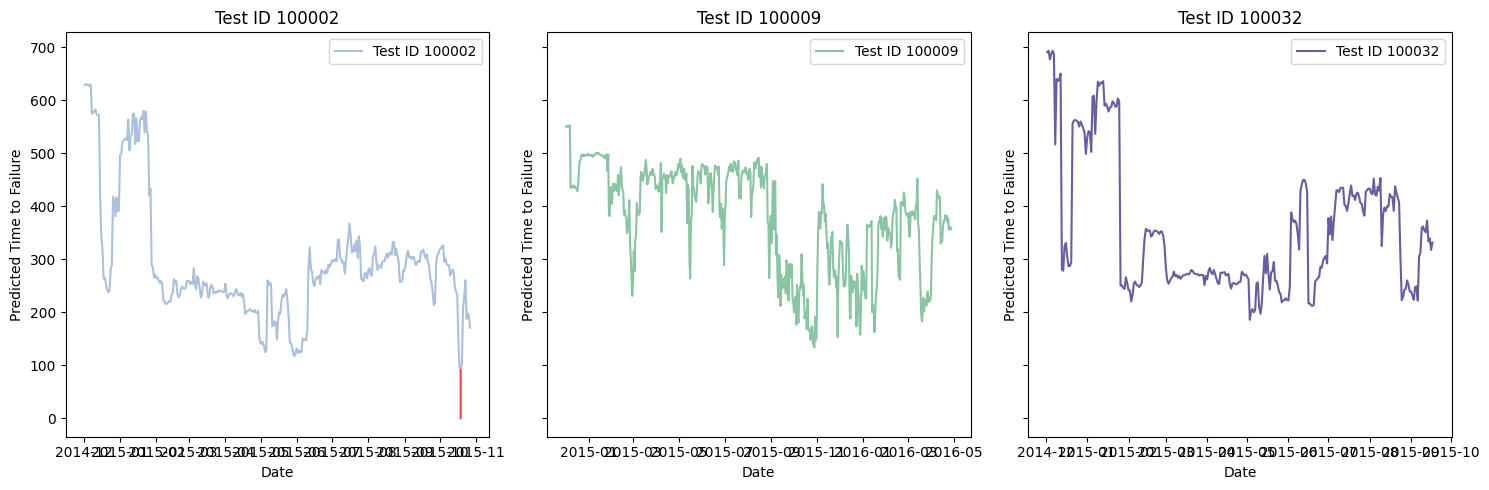

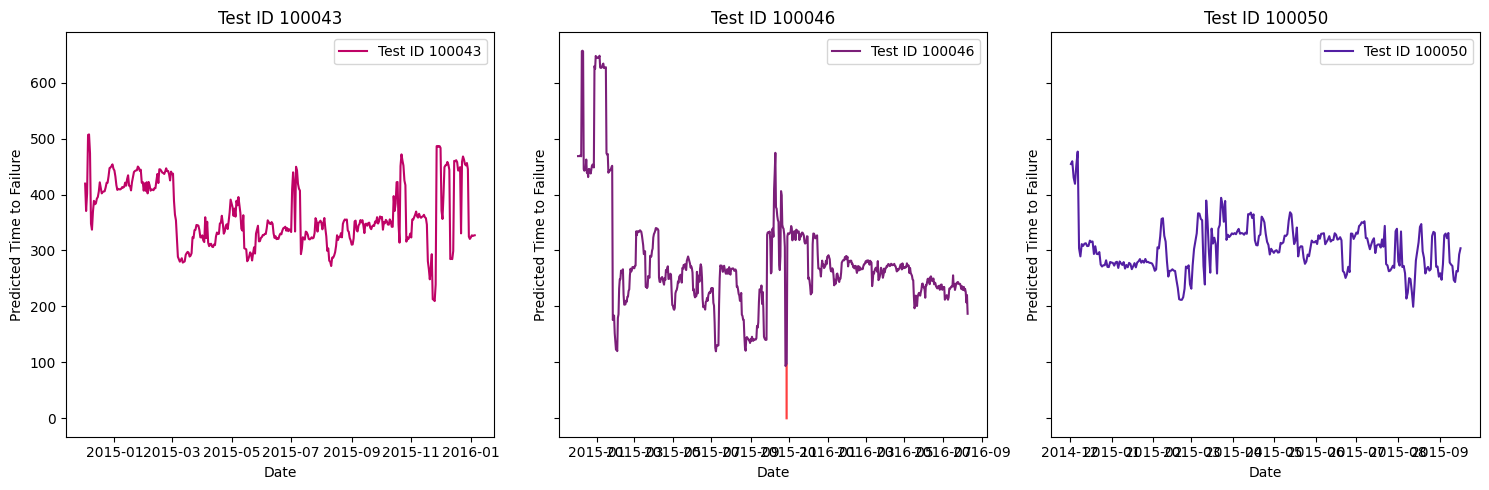

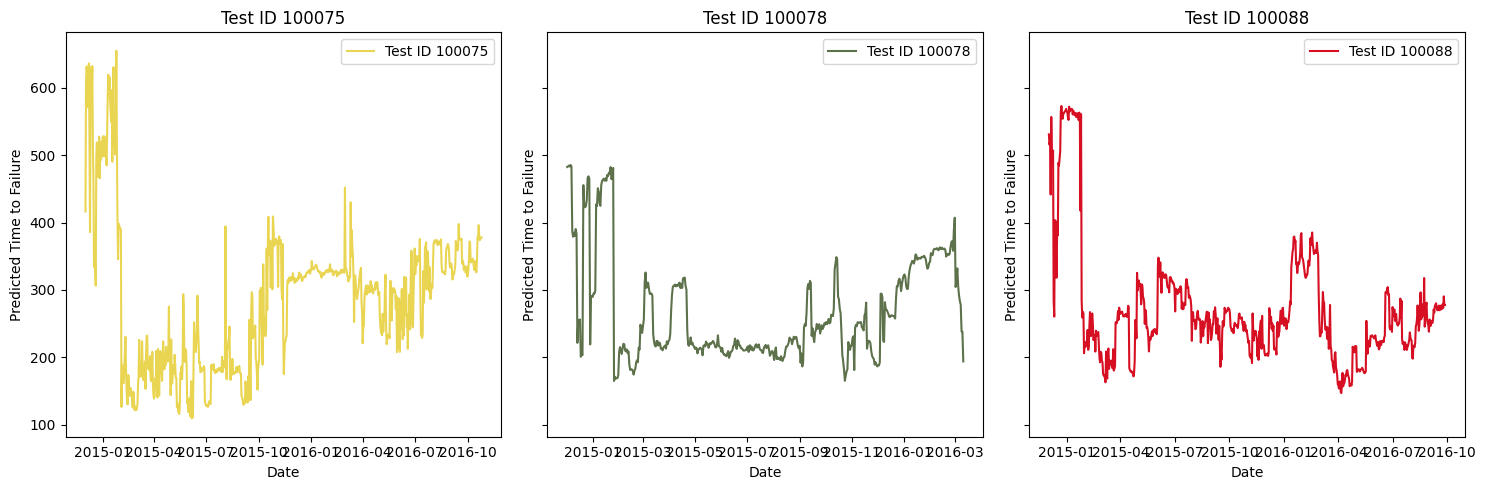

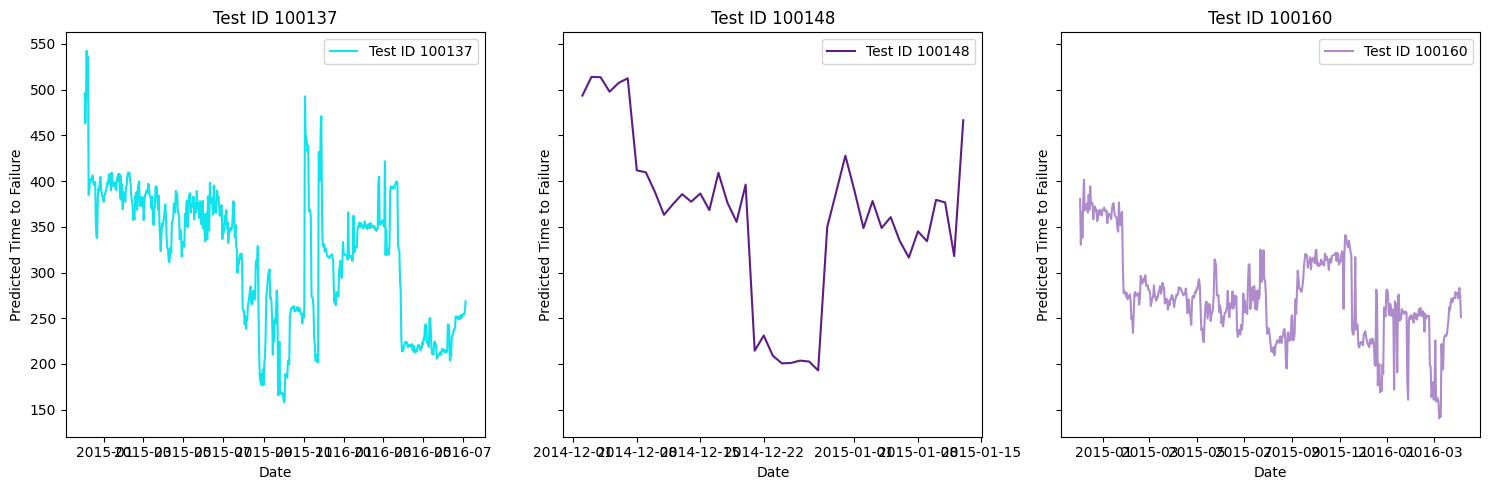

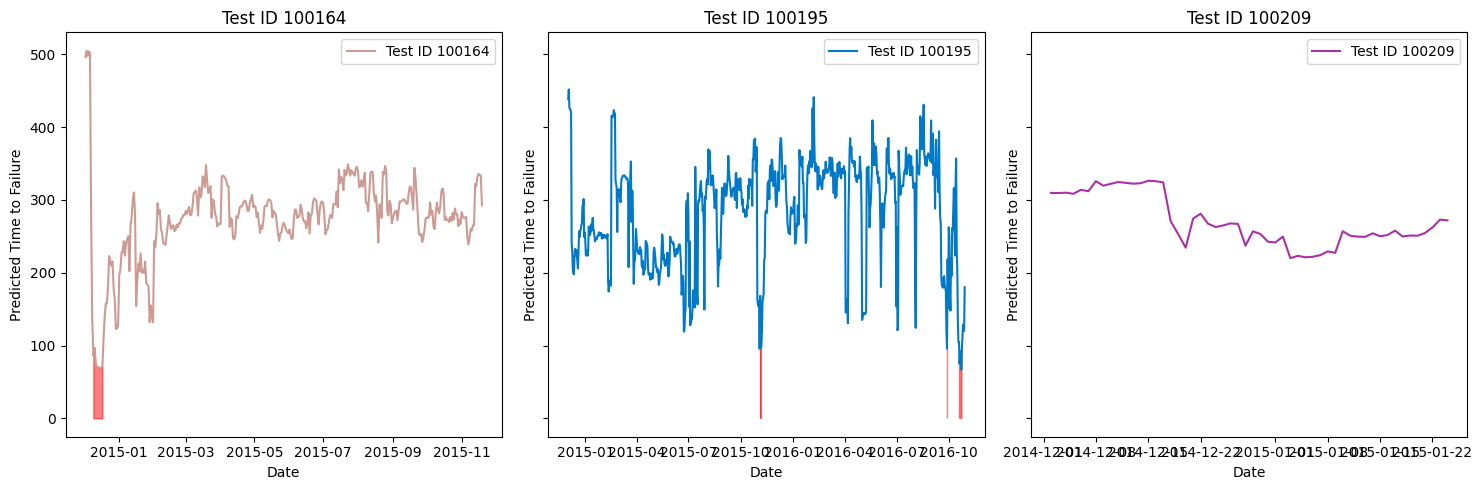

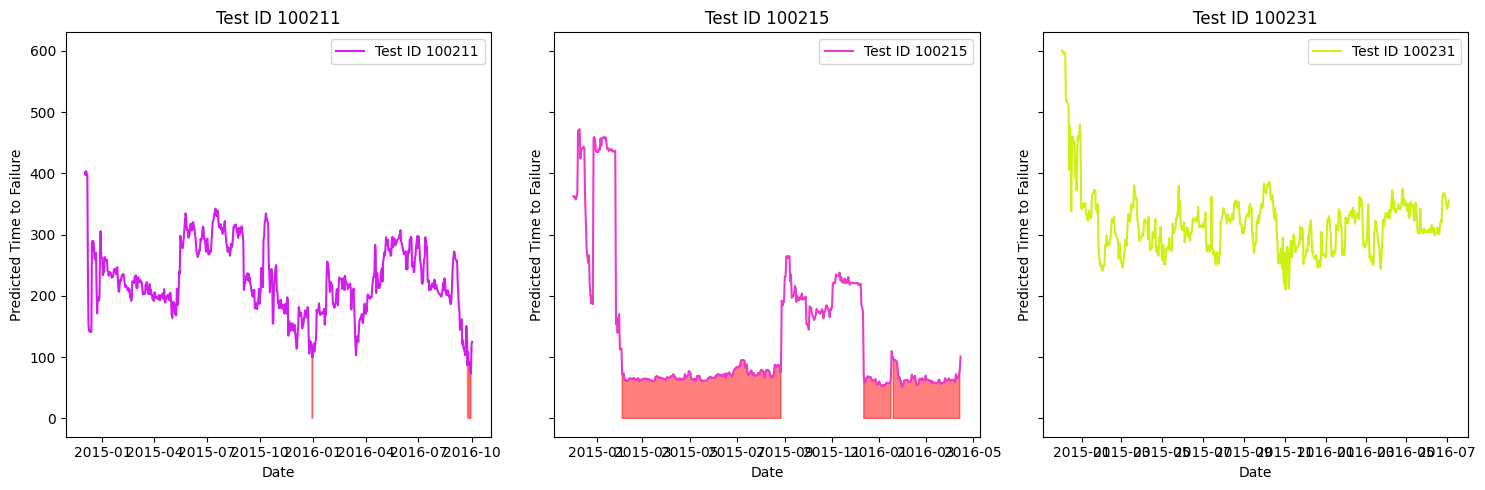

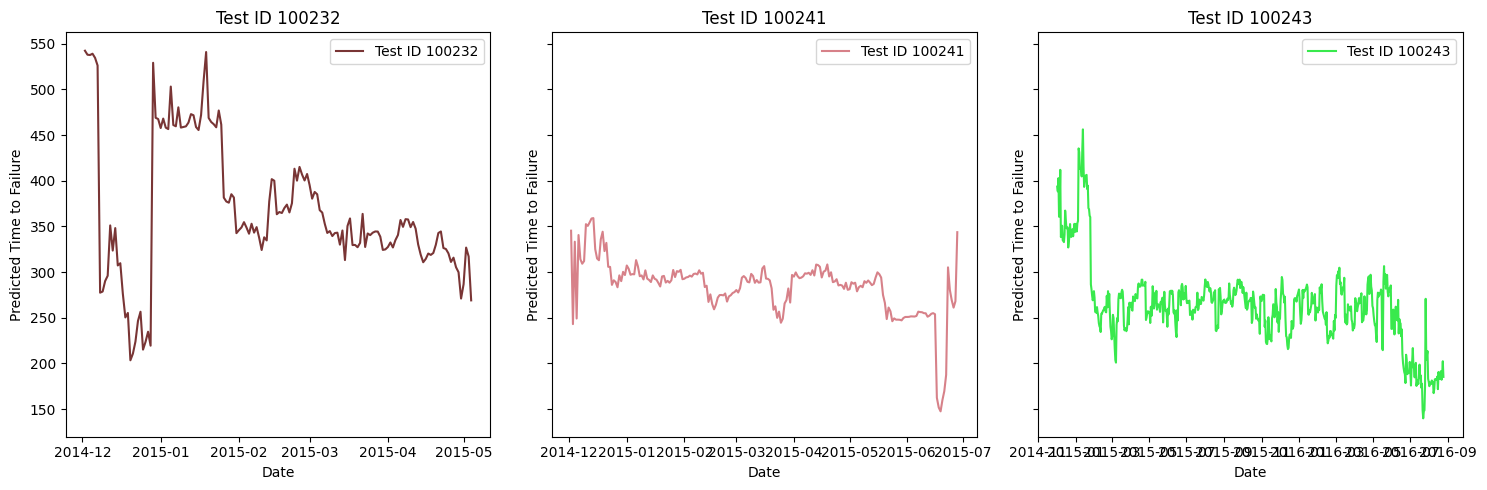

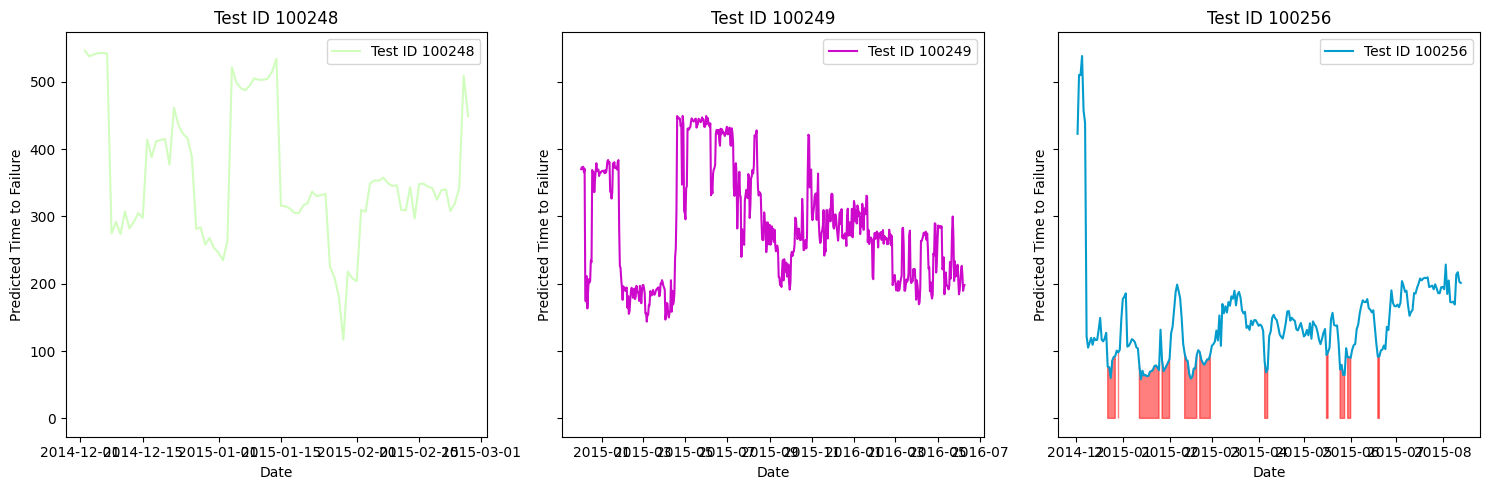

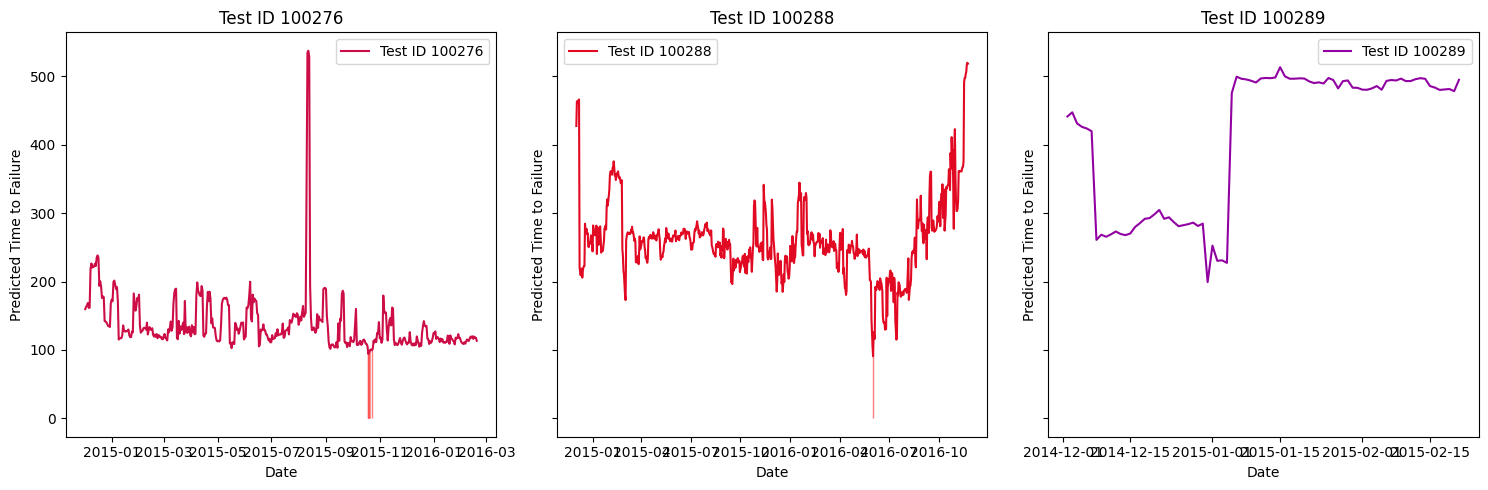

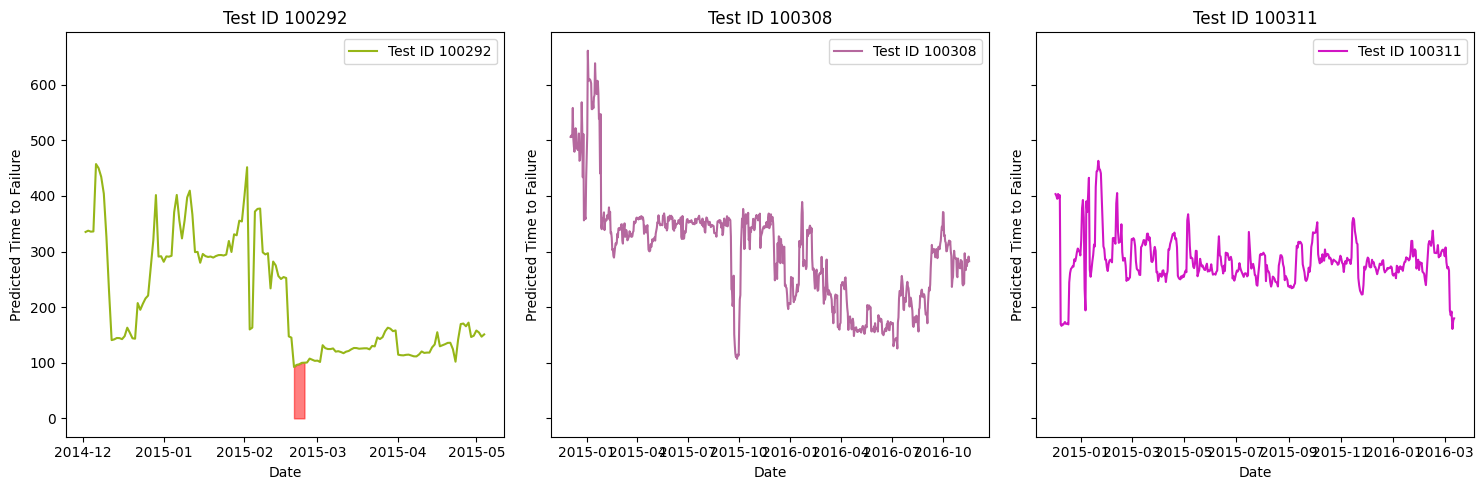

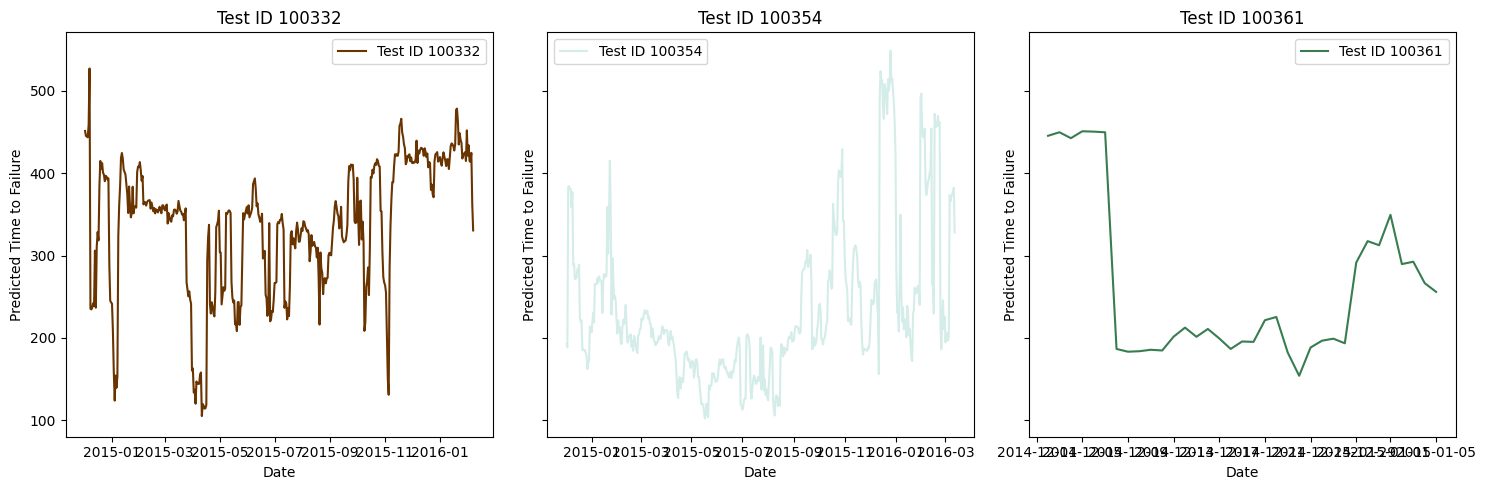

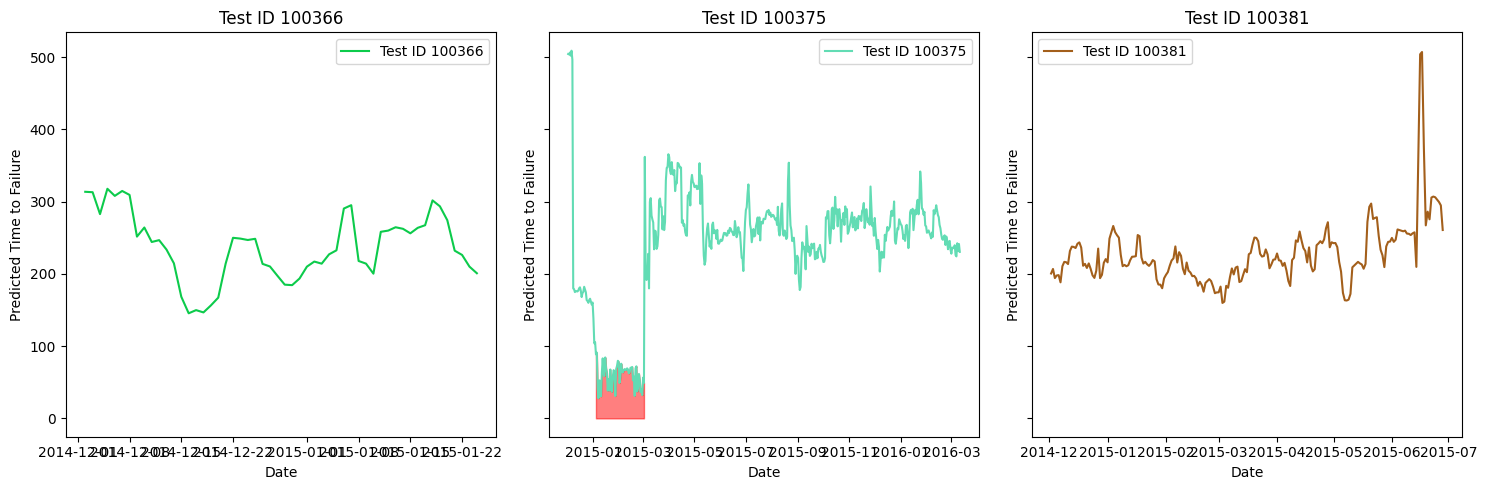

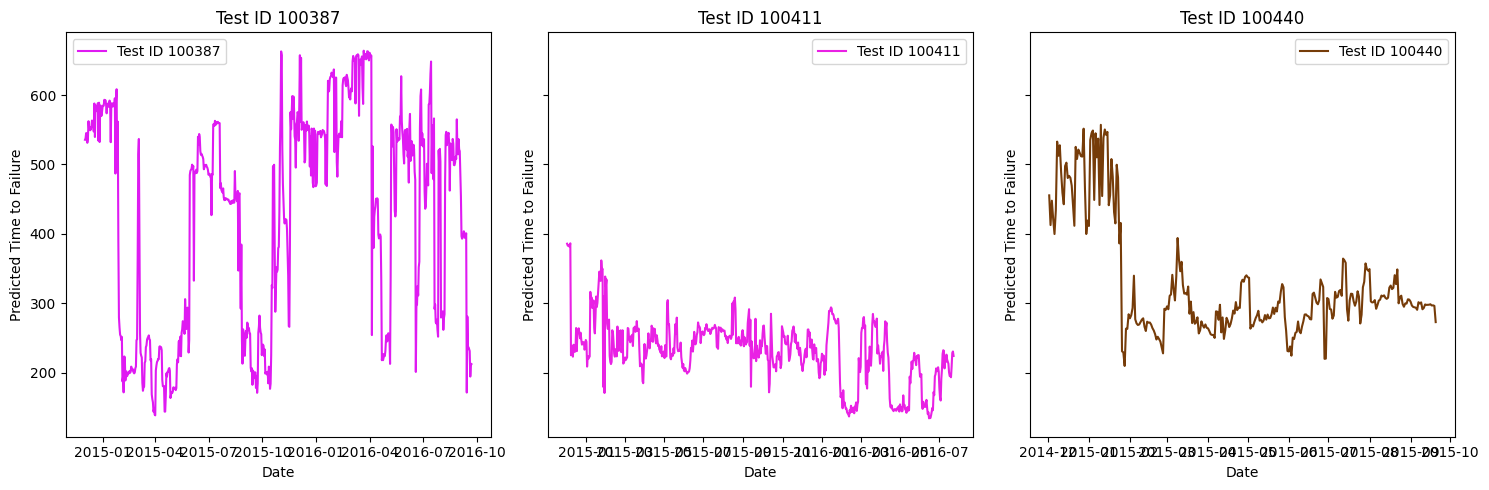

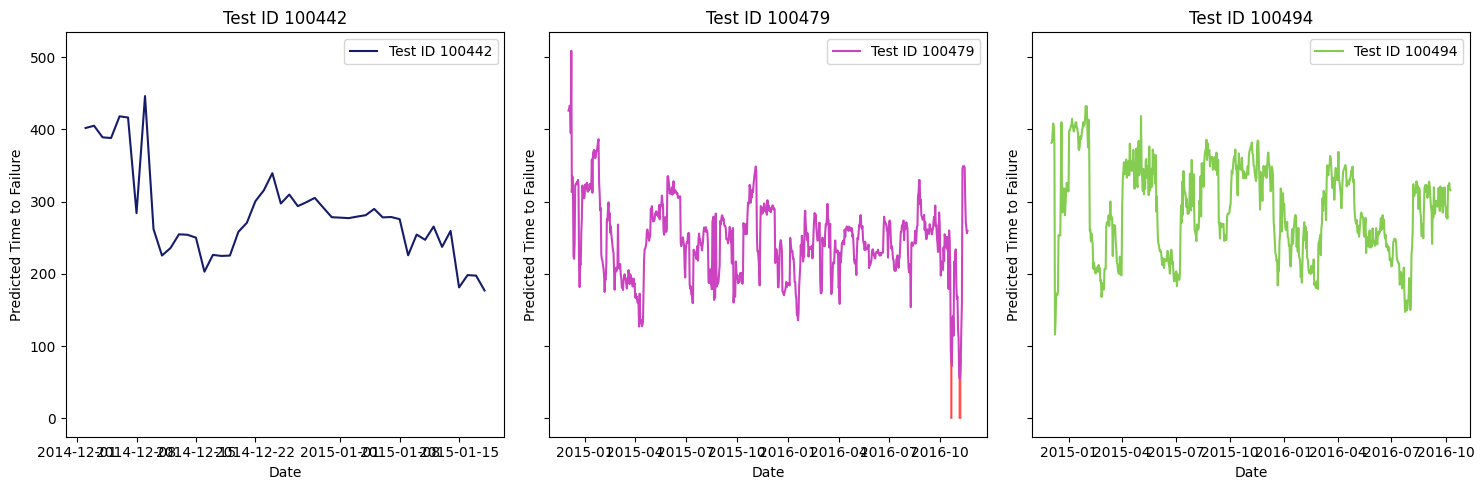

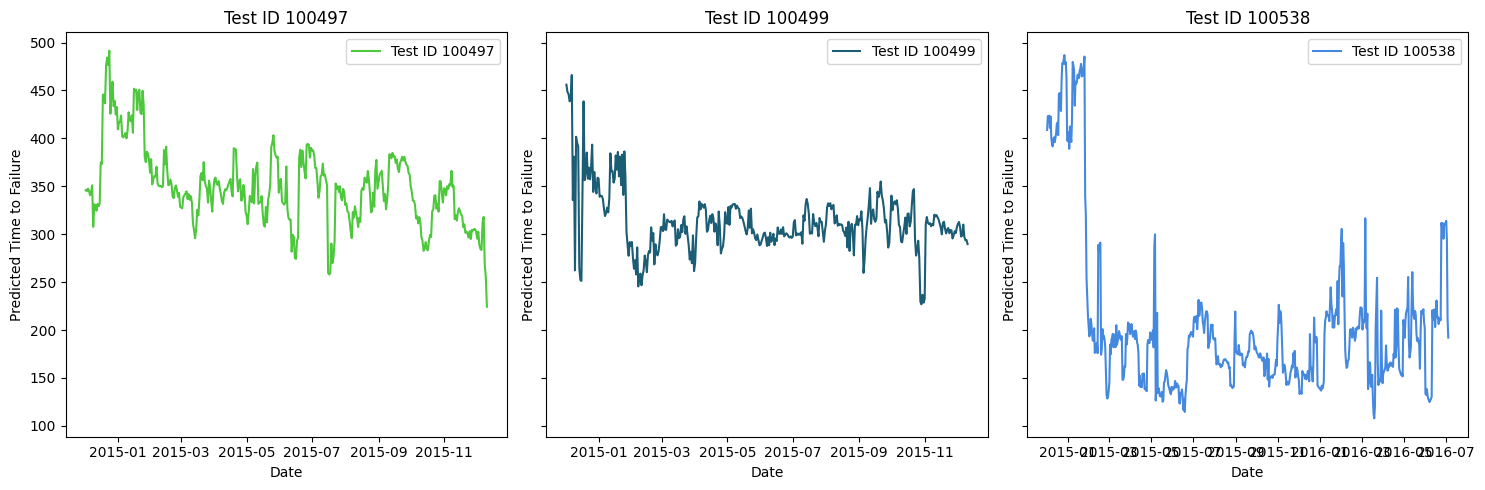

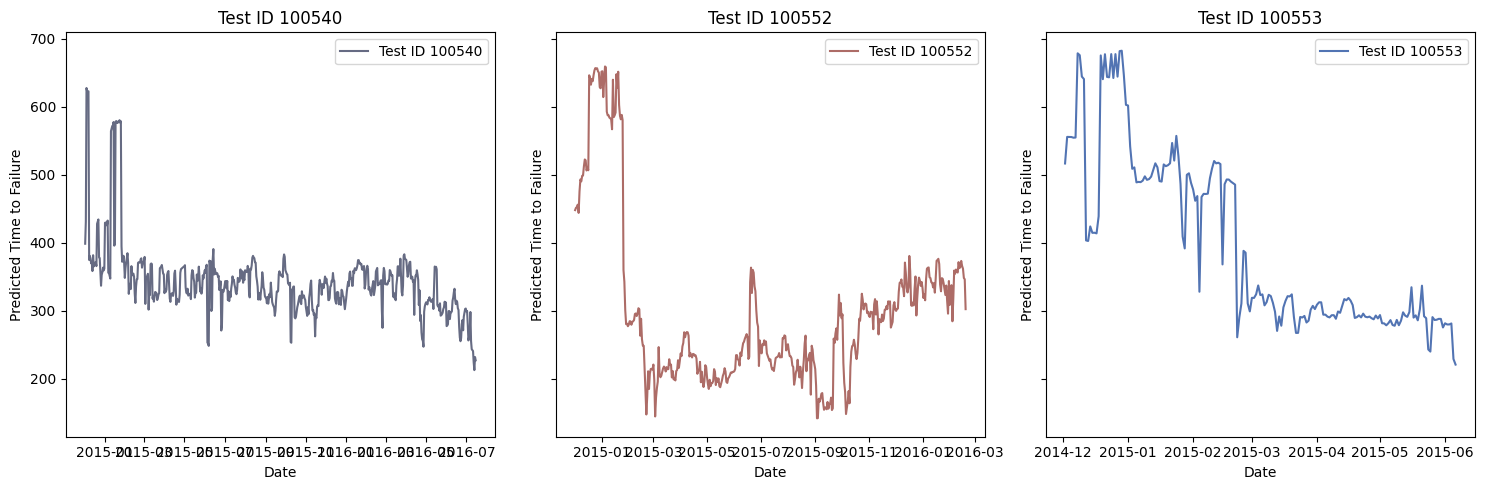

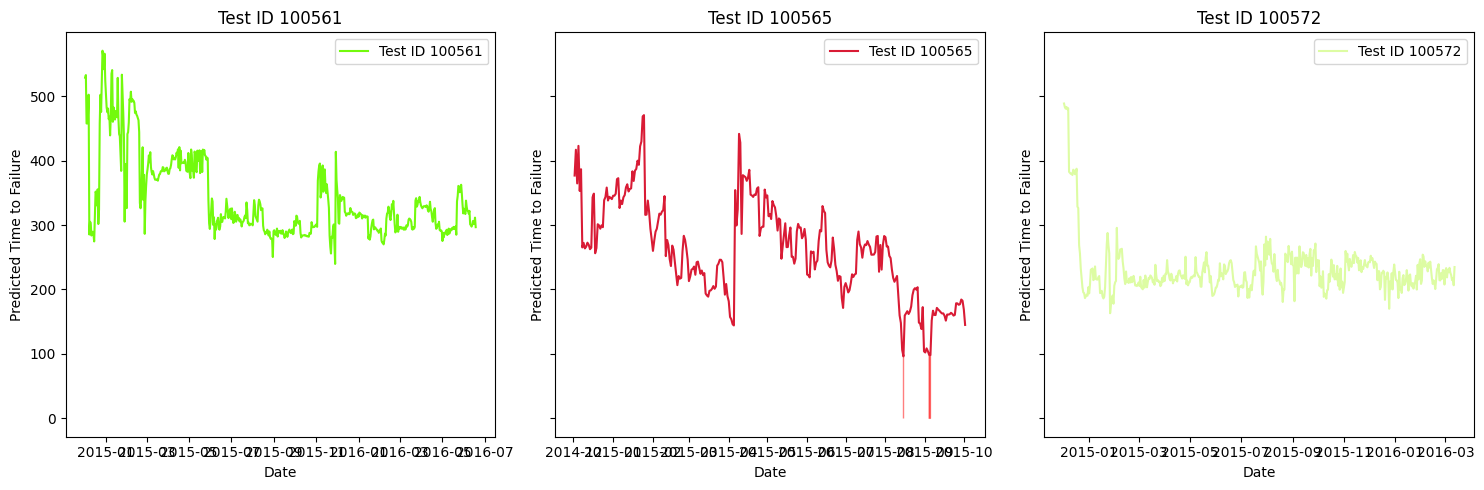

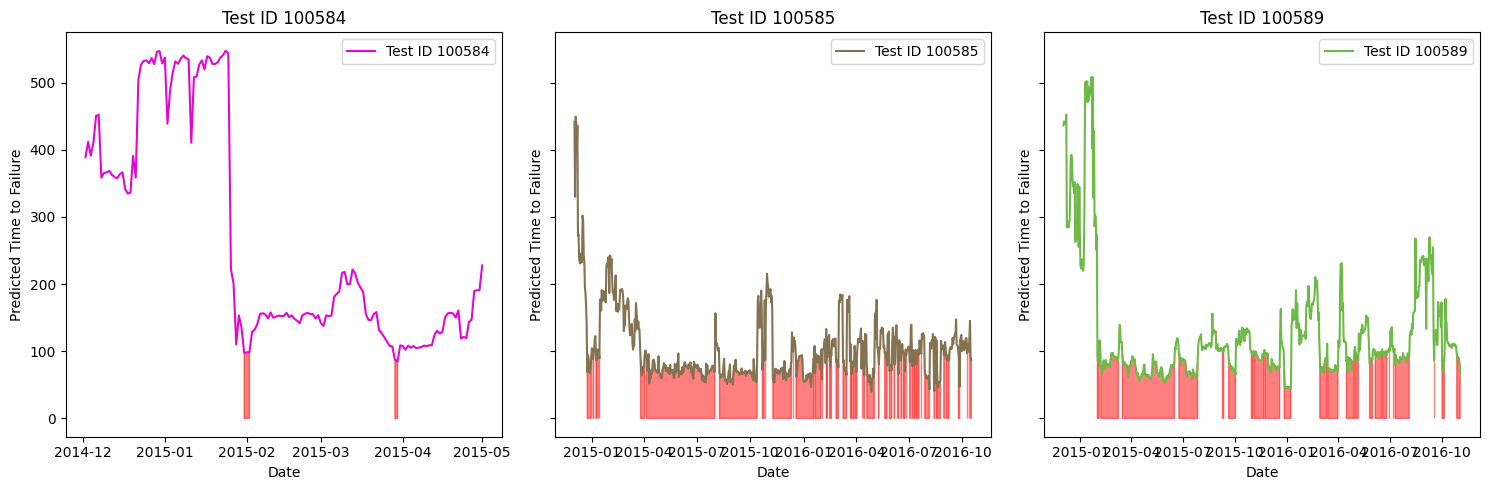

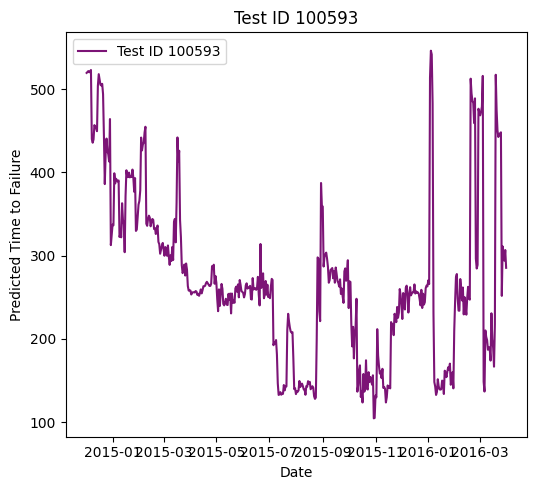

In [ ]:
fig, ax = plt.subplots()
test_with_predictions = test.copy()
test_with_predictions['PREDICTIONS'] = predictions

num_ids_per_plot = 3
ids_per_row = 3
sorted_test_ids = sorted(test_ids)
num_figures = int(np.ceil(len(sorted_test_ids) / num_ids_per_plot))

for i in range(num_figures):
    start_index = i * num_ids_per_plot
    end_index = min((i+1) * num_ids_per_plot, len(sorted_test_ids))
    ids_for_this_figure = sorted_test_ids[start_index:end_index]
    fig, axs = plt.subplots(1, ids_per_row, figsize=(15, 5), sharey=True)
    for j, id in enumerate(ids_for_this_figure):
        data = test_with_predictions[test_with_predictions['ID'] == id]
        color = np.random.rand(3,)
        axs[j].plot(data['DATE'], data['PREDICTIONS'], label=f'Test ID {id}', color=color)
        axs[j].fill_between(data['DATE'], data['PREDICTIONS'], where=(data['PREDICTIONS']<100), color='red', alpha=0.5)
        axs[j].set_xlabel('Date')
        axs[j].set_ylabel('Predicted Time to Failure')
        axs[j].set_title(f'Test ID {id}')
        axs[j].legend()
    for k in range(j+1, ids_per_row):
        fig.delaxes(axs[k])

    plt.tight_layout()
    plt.show()